## **1. Know The Data**

### **Import Libraries**

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source
from sklearn.utils import shuffle
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Dataset Loading**

In [ ]:
# Charger le fichier de scrapping
df = pd.read_excel("dataversionfinal2.xlsx")

### **Dataset First View**

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Brand,Model,Price,Boite vitesse,Carrosserie,Couleur extérieure,Cylindrée,Gouvernorat,Génération,Kilométrage,Mise en circulation,Nombre de places,Nombre de portes,Puissance fiscale,Sellerie,Transmission,Énergie
0,Mercedes-Benz,Classe C,230 000DT,Automatique,Berline,Gris Shark,1500cm³,BenArous,(206) Berline03/2021 - Aujourd'hui,7300km,2022-11-01 00:00:00,5.0,5.0,9cv,Cuir intégral,Propulsion,Essence
1,Wallyscar,719,36 086 000DT,Manuelle,Berline,Noir,1600cm³,Sousse,12/2022 - Aujourd'hui,87564km,2023-02-01 00:00:00,5.0,4.0,7cv,Velours,Traction,Essence
2,Seat,Leon SC,49 500DT,Manuelle,Coupé,Gris anthracite,1200cm³,Bizerte,III (5F5) SC 3 portes11/2012 - 10/2016,120000km,2017-06-01 00:00:00,5.0,2.0,6cv,Tissu,Traction,Essence
3,Fiat,500,54 000DT,Manuelle,Coupé,Gris argent,999cm³,Sousse,III Phase 307/2015 - Aujourd'hui,41000km,2022-06-01 00:00:00,5.0,3.0,4cv,Similicuir,Traction,Hybride essence
4,Haval,H6,76 500DT,Automatique,SUV/4x4,Noir,1500cm³,Nabeul,II01/2019 - 06/2021,89000km,2019-05-01 00:00:00,4.0,5.0,9cv,Cuir intégral,Traction,Essence


### **Dataset Rows & Columns count**

In [ ]:

# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  3784
Number of columns are:  17


### **Dataset Information**

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784 entries, 0 to 3783
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                3698 non-null   object 
 1   Model                3697 non-null   object 
 2   Price                3784 non-null   object 
 3   Boite vitesse        2850 non-null   object 
 4   Carrosserie          2664 non-null   object 
 5   Couleur extérieure   2839 non-null   object 
 6   Cylindrée            2041 non-null   object 
 7   Gouvernorat          3598 non-null   object 
 8   Génération           3306 non-null   object 
 9   Kilométrage          3669 non-null   object 
 10  Mise en circulation  2714 non-null   object 
 11  Nombre de places     2516 non-null   float64
 12  Nombre de portes     2604 non-null   float64
 13  Puissance fiscale    2850 non-null   object 
 14  Sellerie             2043 non-null   object 
 15  Transmission         2099 non-null   o

### **Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 49


### **Missing Values/Null Values**


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Brand,86
Model,87
Price,0
Boite vitesse,934
Carrosserie,1120
Couleur extérieure,945
Cylindrée,1743
Gouvernorat,186
Génération,478
Kilométrage,115


# ***Missingno***

We would be making the use of Missingno library from python. It is a very good graphical representation of missing values in our data. This library could be used to plot the missing values present in our data even when there is a huge data present. Therefore, we could use this library for understanding the missing values in our data.

<Figure size 1500x800 with 0 Axes>

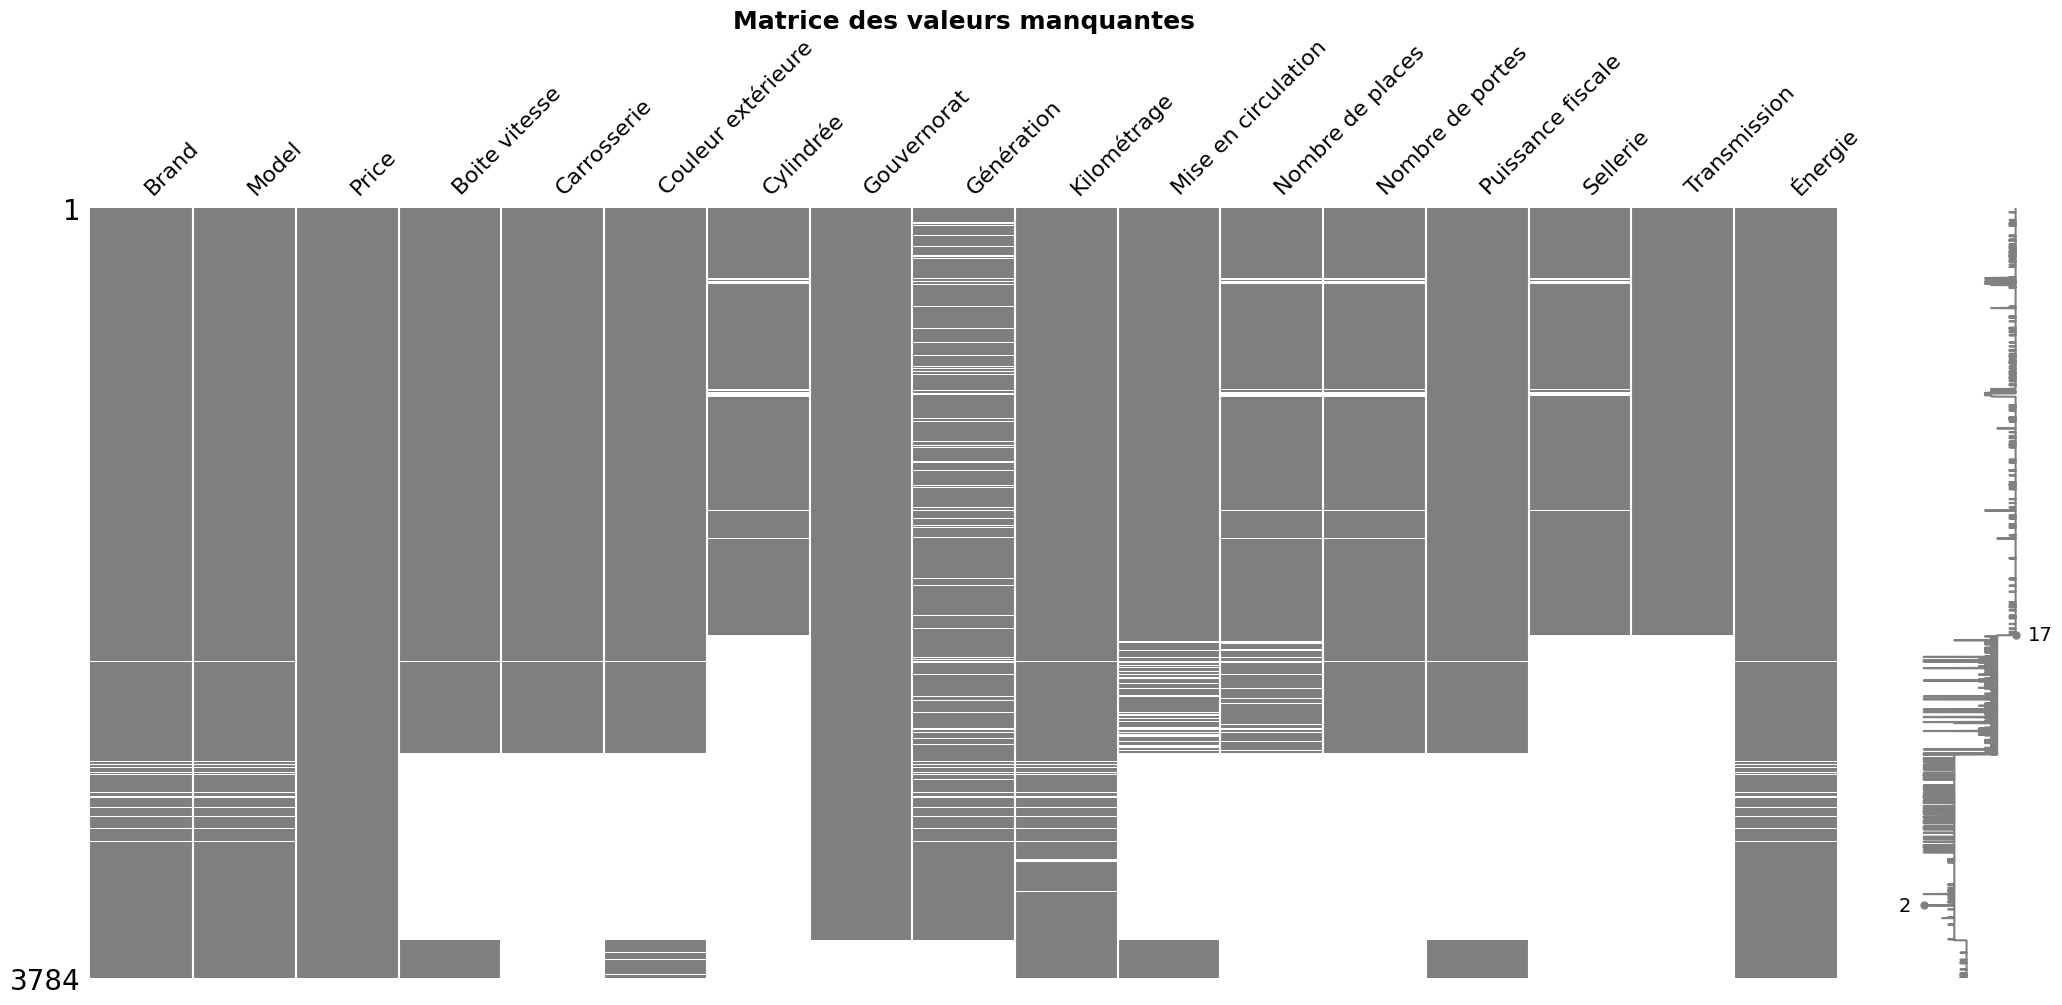

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Charger le dataset
file_path = 'dataversionfinal2.xlsx'  # Remplacez par le chemin correct
data = pd.read_excel(file_path)

# ------------------------------------
# Visualisation des valeurs manquantes avec Missingno
# ------------------------------------
plt.figure(figsize=(15, 8))
msno.matrix(data, color=(0.5, 0.5, 0.5))  # Affichage des valeurs manquantes en matrice
plt.title("Matrice des valeurs manquantes", fontsize=18, fontweight='bold')
plt.show()



**What did we know about the dataset?**


*  The car dataset consists of Brand, Model,Price etc     
           
* There are 3784 rows and 17 columns provided in the data.
* 49 duplicate rows present in the dataset.
* Null values exist in the dataset.

## **2. Understanding The Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Brand', 'Model', 'Price', 'Boite vitesse', 'Carrosserie',
       'Couleur extérieure', 'Cylindrée', 'Gouvernorat', 'Génération',
       'Kilométrage', 'Mise en circulation', 'Nombre de places',
       'Nombre de portes', 'Puissance fiscale', 'Sellerie', 'Transmission',
       'Énergie'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Brand,Model,Price,Boite vitesse,Carrosserie,Couleur extérieure,Cylindrée,Gouvernorat,Génération,Kilométrage,Mise en circulation,Nombre de places,Nombre de portes,Puissance fiscale,Sellerie,Transmission,Énergie
count,3698,3697,3784,2850,2664,2839,2041,3598,3306.0,3669,2714,2516.00,2604.00,2850,2043,2099,3698
unique,76,559,1084,3,15,58,201,224,612.0,934,456,NaN,NaN,73,6,3,8
top,Volkswagen,Autre Modèle,1 DT,Automatique,SUV/4x4,Noir,1200cm³,Tunis,2017.0,200 000 km,2020-01-01 00:00:00,NaN,NaN,6cv,Tissu,Traction,Essence
freq,403,237,84,1448,728,943,135,890,98.0,104,45,NaN,NaN,344,719,1632,2649
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.86,4.38,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.77,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,4.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,NaN,NaN,NaN,NaN


**Check Unique Values for each variable**

In [ ]:

for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Brand is 76
No. of unique values in Model is 559
No. of unique values in Price is 1084
No. of unique values in Boite vitesse is 3
No. of unique values in Carrosserie is 15
No. of unique values in Couleur extérieure is 58
No. of unique values in Cylindrée is 201
No. of unique values in Gouvernorat is 224
No. of unique values in Génération is 612
No. of unique values in Kilométrage is 934
No. of unique values in Mise en circulation is 456
No. of unique values in Nombre de places is 7
No. of unique values in Nombre de portes is 5
No. of unique values in Puissance fiscale is 73
No. of unique values in Sellerie is 6
No. of unique values in Transmission is 3
No. of unique values in Énergie is 8


## **3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**3.1 Countplot**


Countplots are used with the help of seaborn library in python. These plots give us a good understanding of the total number of elements present in a particular feature that we have considered. Below are a list of countplots for different features of interest which would help in understanding the overall distribution of data based on different features. Therefore, taking a look at these plots would ensure that one is familiar with the data along with the total number of classes for different features respectively.

**3.1.1 Countplot of different car companies**

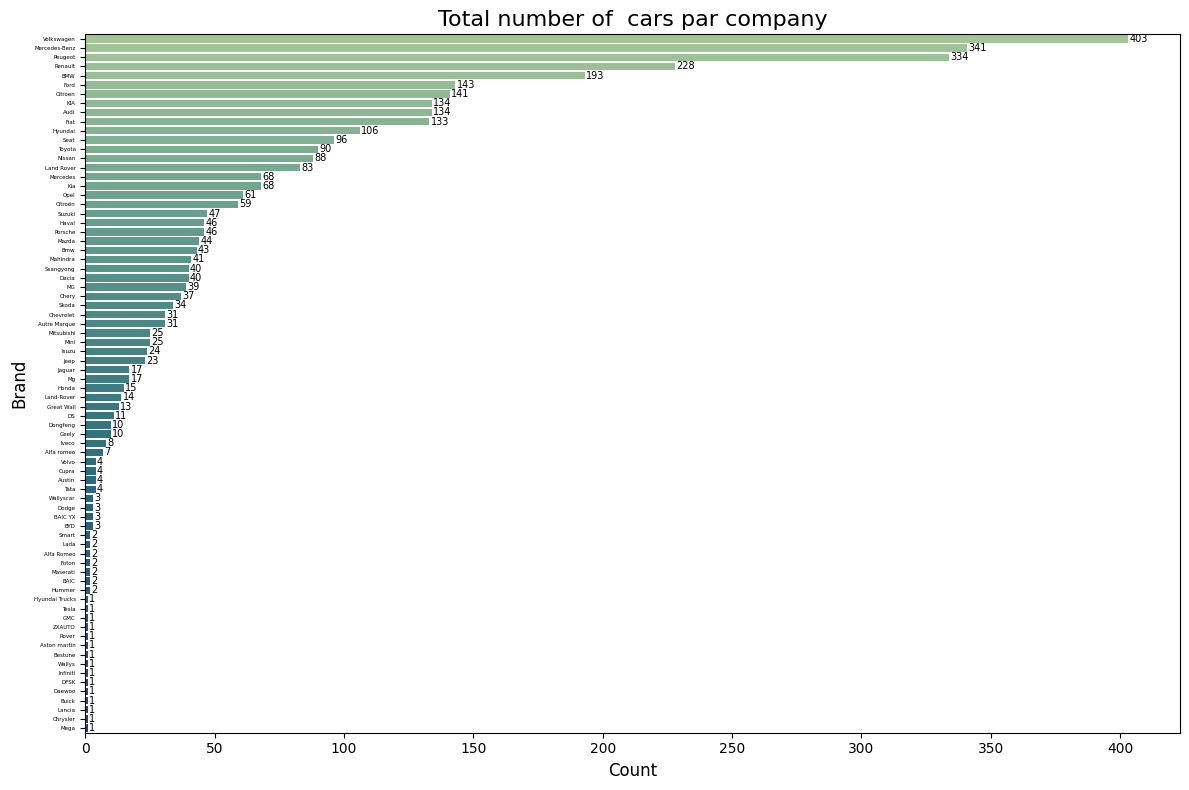

In [ ]:
# Grouper par entreprise et compter les voitures
cars_per_company = df['Brand'].value_counts()

# Trier les entreprises par nombre de voitures
cars_per_company = cars_per_company.sort_values(ascending=False)

# Taille de la figure
plt.figure(figsize=(12, 8))

# Créer le graphique
sns.barplot(
    y=cars_per_company.index,
    x=cars_per_company.values,
    palette='crest'
)

# Ajouter des annotations pour afficher les valeurs sur chaque barre
for index, value in enumerate(cars_per_company.values):
    plt.text(value + 0.5, index, str(value), va='center', ha='left', fontsize=7, color='black')

# Titres et légendes
plt.title('Total number of  cars par company', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.yticks(fontsize=4)  # Ajustez la taille ici
# Ajouter des marges pour éviter un chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()


**3.1.2 Countplot of Top 10 Most Selling Car**

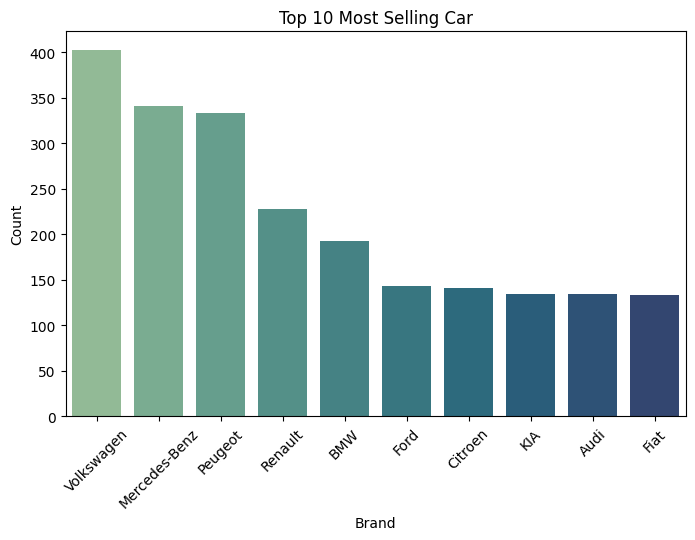

In [ ]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Brand'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Brand', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

**3.1.2 Counting the cars based on transmission type**

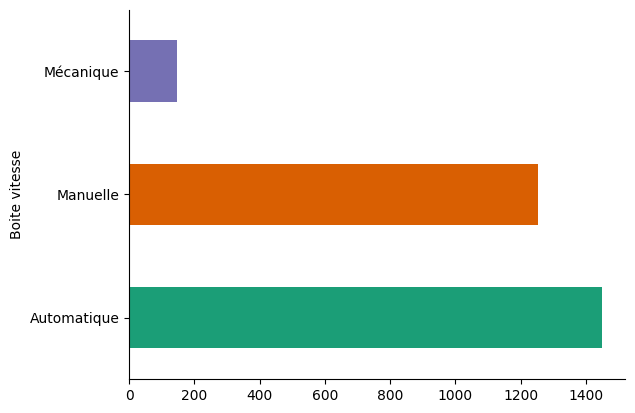

In [ ]:

df.groupby('Boite vitesse').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**3.1.3 Countplot of Engine Fuel Type**




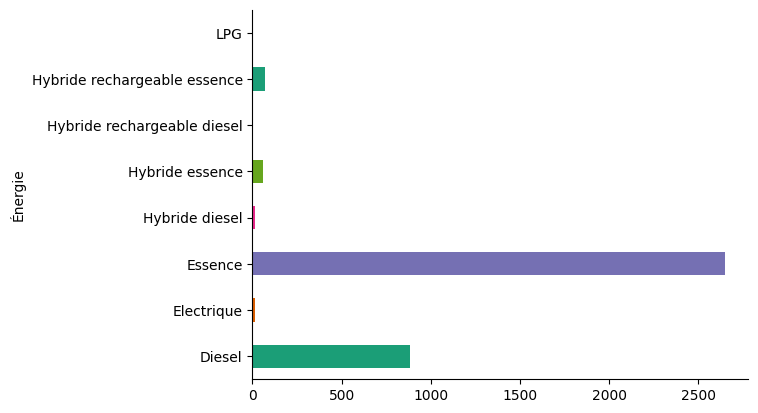

In [ ]:
df.groupby('Énergie').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**3.1.4 Countplot of the Top 10 Governorates by Number of Cars**

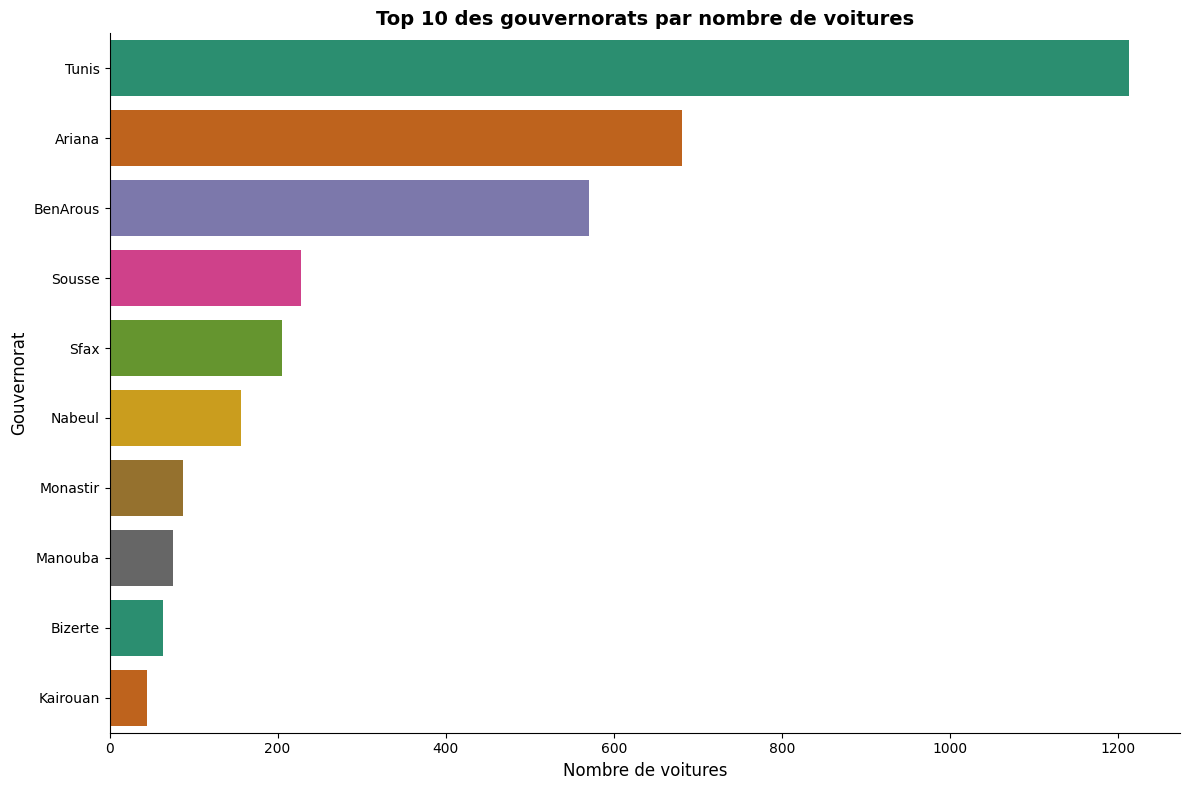

In [ ]:
def clean_gouvernorat(value):
    if isinstance(value, str):
        # Diviser par la virgule et garder la dernière partie
        cleaned_value = value.split(',')[-1].strip()
        # Supprimer les espaces internes et uniformiser les variations de Ben Arous
        cleaned_value = cleaned_value.replace(" ", "").capitalize()
        if "benarous" in cleaned_value.lower():  # Uniformiser Ben Arous
            return "BenArous"
        return cleaned_value
    return value

# Appliquer le nettoyage
df['Gouvernorat'] = df['Gouvernorat'].apply(clean_gouvernorat)

# Fusionner les doublons après nettoyage
top_gouvernorats = df['Gouvernorat'].value_counts().head(10)

# Affichage des résultats
plt.figure(figsize=(12, 8))
sns.barplot(x=top_gouvernorats.values, y=top_gouvernorats.index, palette="Dark2")
plt.title("Top 10 des gouvernorats par nombre de voitures", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de voitures", fontsize=12)
plt.ylabel("Gouvernorat", fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Nettoyer la colonne Kilométrage en supprimant les caractères "km" et en convertissant en numérique
df['Kilométrage'] = df['Kilométrage'].replace({' km': '', ',': ''}, regex=True)

# Convertir la colonne Kilométrage en type numérique (en cas d'erreurs, les valeurs non convertibles deviendront NaN)
df['Kilométrage'] = pd.to_numeric(df['Kilométrage'], errors='coerce')

**3.1.5 Driven Kilometers vs Selling Price**

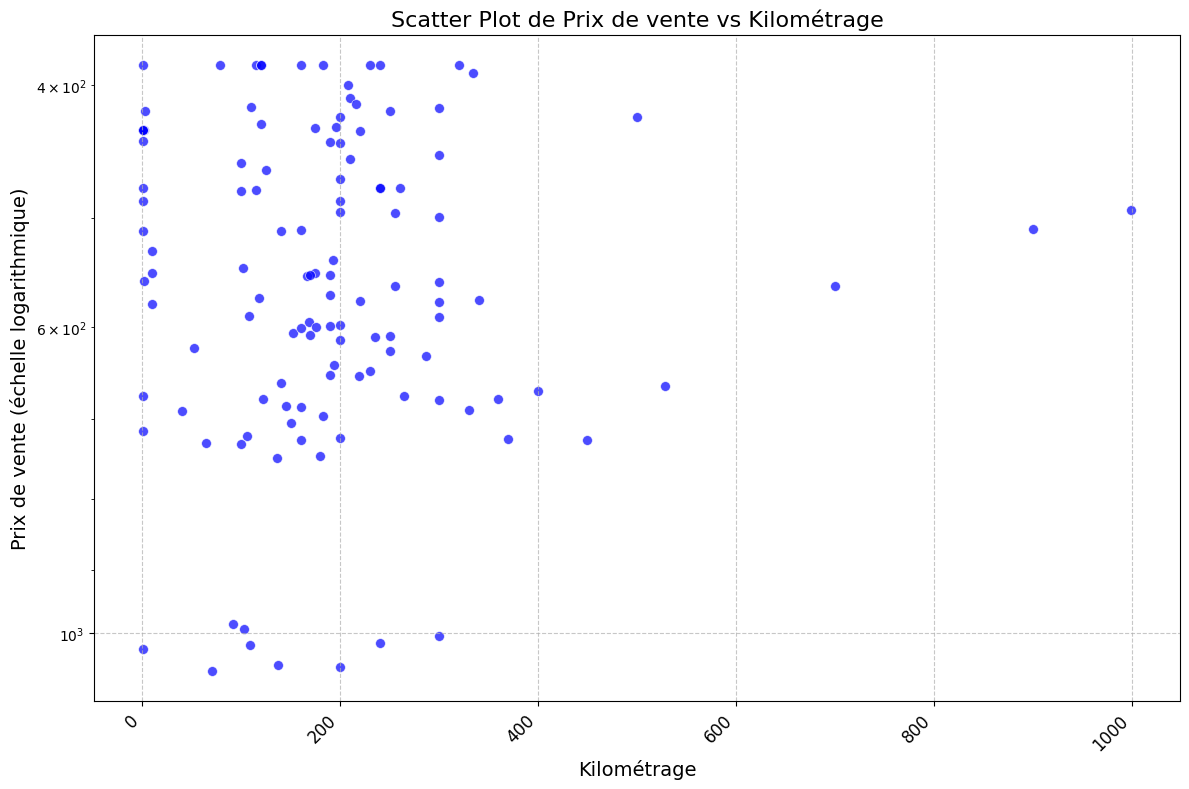

In [ ]:


# Créer le graphique avec les données filtrées
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Kilométrage', y='Price', s=50, color='b', alpha=0.7)

# Définir une échelle logarithmique pour l'axe Y (prix)
plt.yscale('log')

# Ajouter les labels et le titre
plt.xlabel('Kilométrage', fontsize=14)
plt.ylabel('Prix de vente (échelle logarithmique)', fontsize=14)
plt.title('Scatter Plot de Prix de vente vs Kilométrage', fontsize=16)

# Rotation des ticks pour mieux les voir
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajouter une grille pour une meilleure visibilité
plt.grid(True, linestyle='--', alpha=0.7)

# Ajuster l'affichage pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


In [ ]:
# Convertir la colonne 'Puissance fiscale' en chaîne de caractères, puis nettoyer
df['Puissance fiscale'] = df['Puissance fiscale'].astype(str)  # S'assurer que c'est une chaîne
df['Puissance fiscale'] = df['Puissance fiscale'].str.replace(r'\s*CV|cv|\s*', '', regex=True)  # Retirer "CV", "cv" et les espaces
df['Puissance fiscale'] = pd.to_numeric(df['Puissance fiscale'], errors='coerce')  # Convertir en numérique (les erreurs seront mises à NaN)

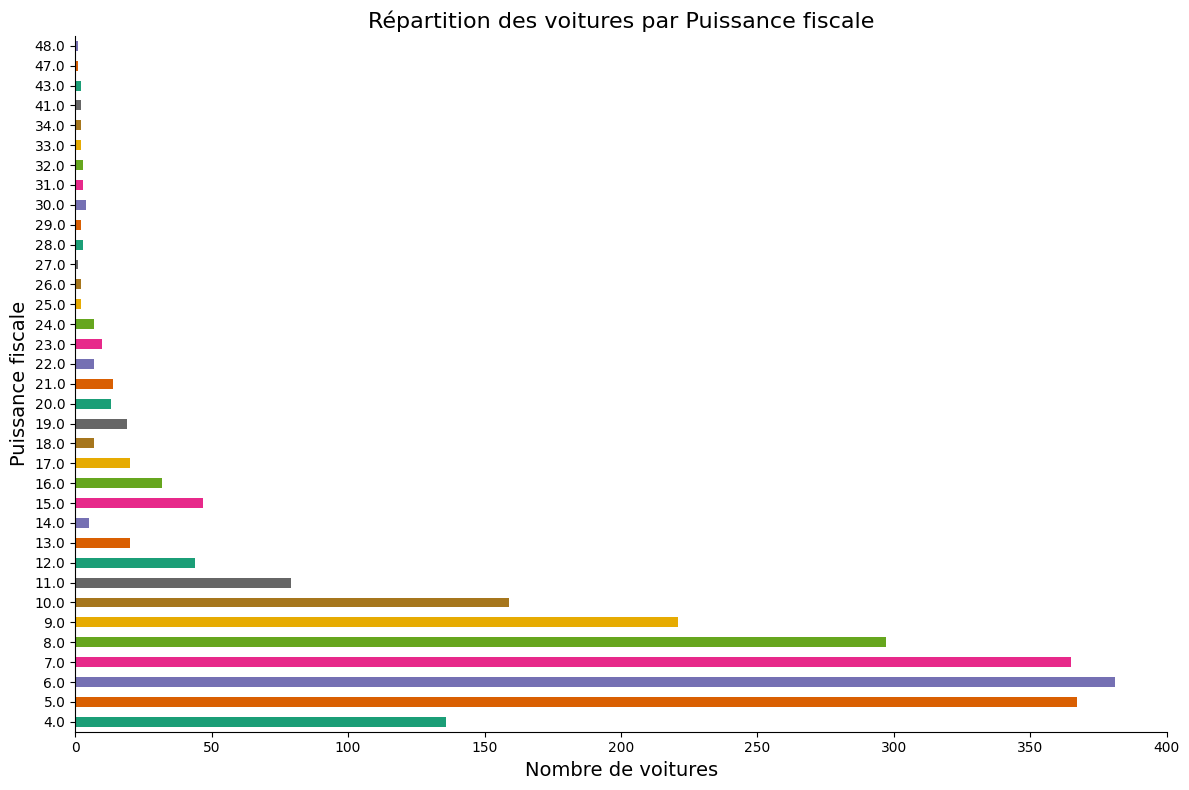

In [ ]:


# Compter le nombre de voitures pour chaque Puissance fiscale
power_counts = df.groupby('Puissance fiscale').size()

# Créer le graphique avec toutes les puissances fiscales
plt.figure(figsize=(12, 8))
power_counts.plot(kind='barh', color=sns.color_palette('Dark2'))

# Supprimer les bordures en haut et à droite
plt.gca().spines[['top', 'right']].set_visible(False)

# Ajouter des labels et le titre
plt.xlabel('Nombre de voitures', fontsize=14)
plt.ylabel('Puissance fiscale', fontsize=14)
plt.title('Répartition des voitures par Puissance fiscale', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()

#GROUPBY

Groupby is a good useful function in python where the values are grouped based on feature (or) features that we give to the groupby function and things such as mean, median, mode or other aggregate functions could be performed once the data values are grouped together. Below are some of the plots which are made possible with the help of groupy function in python.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset
file_path = 'dataversionfinal2.xlsx'  # Remplacez par le chemin correct
data = pd.read_excel(file_path)

# Assurez-vous que la colonne "Price" est bien numérique
data['Price'] = pd.to_numeric(data['Price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

# Assurez-vous que la colonne "Mise en circulation" contient des années
data['Year'] = pd.to_datetime(data['Mise en circulation'], errors='coerce').dt.year


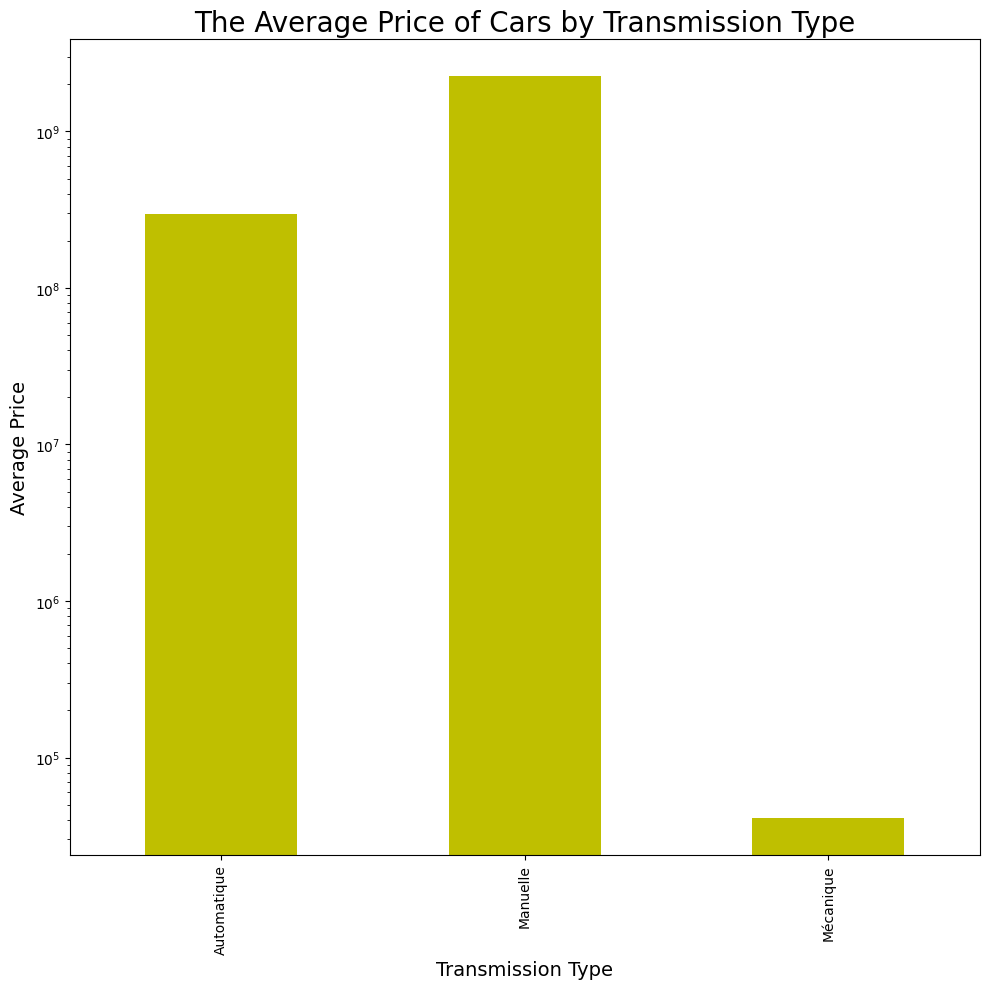

In [ ]:
import matplotlib.pyplot as plt

# Assurez-vous que votre DataFrame est chargé et prêt
# Exemple : data = pd.read_csv('chemin_vers_votre_fichier.csv')

if 'Boite vitesse' in data.columns:
    plt.figure(figsize=(10, 10))
    data.groupby('Boite vitesse')['Price'].mean().plot(kind='bar', color='y', logy=True)  # Utilisation de l'échelle logarithmique
    plt.title("The Average Price of Cars by Transmission Type", fontsize=20)
    plt.xlabel('Transmission Type', fontsize=14)
    plt.ylabel('Average Price', fontsize=14)
    plt.tight_layout()
    plt.show()



Prix moyen par type de transmission :
   Transmission  Average Price
0    Intégrale  155065.015209
1   Propulsion  107200.980392
2     Traction  109771.857230

Prix moyen par marque :
            Brand  Average Price
65     Ssangyong   1.379452e+11
26          Ford   2.447601e+10
16       Citroen   1.821417e+10
11           Bmw   5.282715e+09
69        Toyota   1.805635e+09
..           ...            ...
51          Mega   1.900000e+04
19          DFSK   1.850000e+04
22        Daewoo   7.000000e+03
2   Aston martin   7.000000e+01
44        Lancia   1.000000e+00

[75 rows x 2 columns]


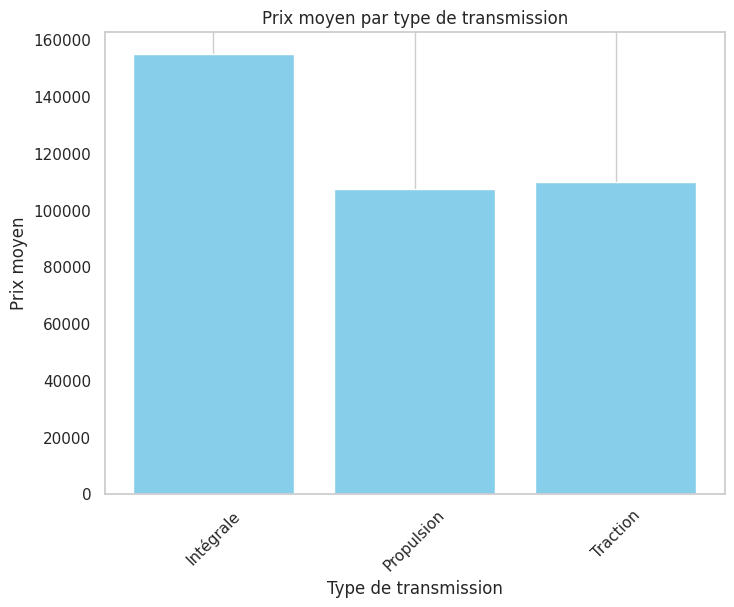

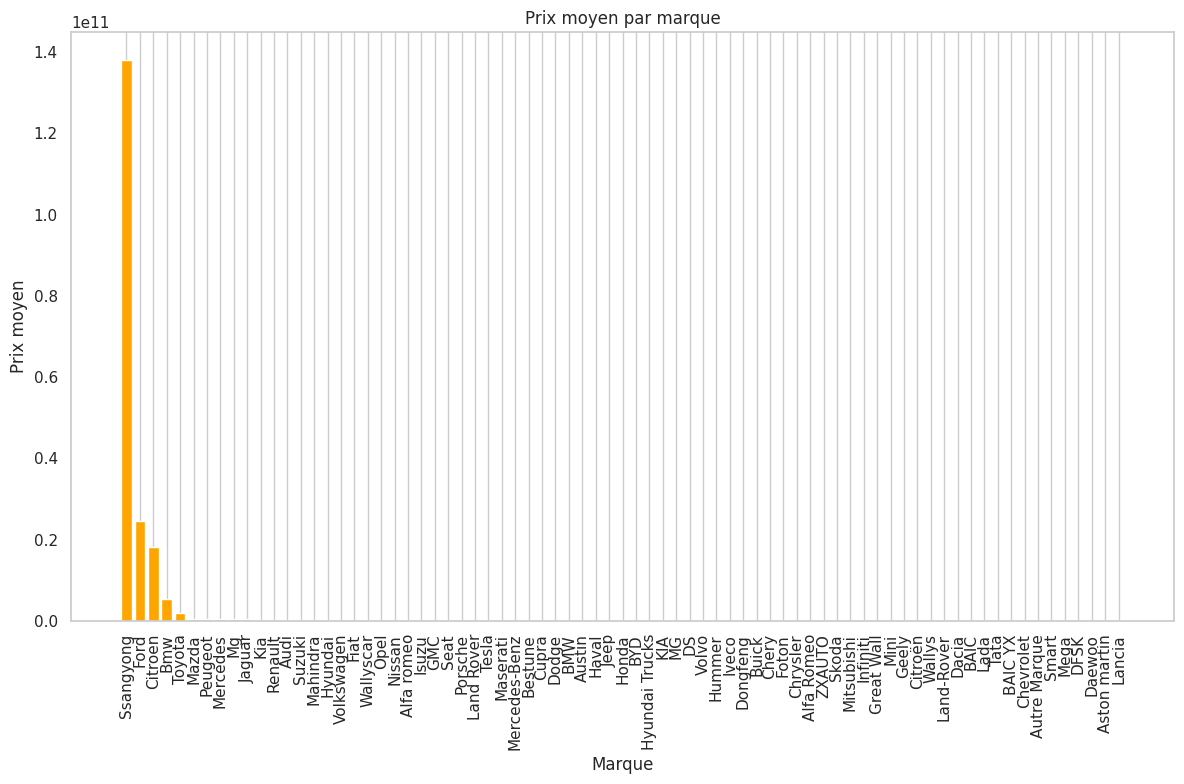

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = "dataversionfinal2.xlsx"  # Remplacez par le chemin de votre fichier
data = pd.read_excel(file_path)

# Nettoyage des colonnes
# Convertir la colonne 'Price' en numérique en supprimant les caractères non numériques
data['Price'] = pd.to_numeric(data['Price'].str.replace(r"[^\d.]", "", regex=True), errors='coerce')

# Supprimer les lignes avec des valeurs manquantes après conversion
data = data.dropna(subset=['Price'])

# Groupement 1 : Prix moyen par type de transmission
average_price_by_transmission = data.groupby("Transmission")["Price"].mean().reset_index()
average_price_by_transmission.columns = ["Transmission", "Average Price"]
print("\nPrix moyen par type de transmission :\n", average_price_by_transmission)

# Groupement 2 : Prix moyen par marque (Brand)
average_price_by_brand = data.groupby("Brand")["Price"].mean().reset_index()
average_price_by_brand.columns = ["Brand", "Average Price"]
average_price_by_brand = average_price_by_brand.sort_values(by="Average Price", ascending=False)
print("\nPrix moyen par marque :\n", average_price_by_brand)

# Visualisation des résultats
# Graphique 1 : Prix moyen par type de transmission
plt.figure(figsize=(8, 6))
plt.bar(average_price_by_transmission["Transmission"], average_price_by_transmission["Average Price"], color='skyblue')
plt.title("Prix moyen par type de transmission")
plt.xlabel("Type de transmission")
plt.ylabel("Prix moyen")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Graphique 2 : Prix moyen par marque
plt.figure(figsize=(12, 8))
plt.bar(average_price_by_brand["Brand"], average_price_by_brand["Average Price"], color='orange')
plt.title("Prix moyen par marque")
plt.xlabel("Marque")
plt.ylabel("Prix moyen")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# **heatmap**

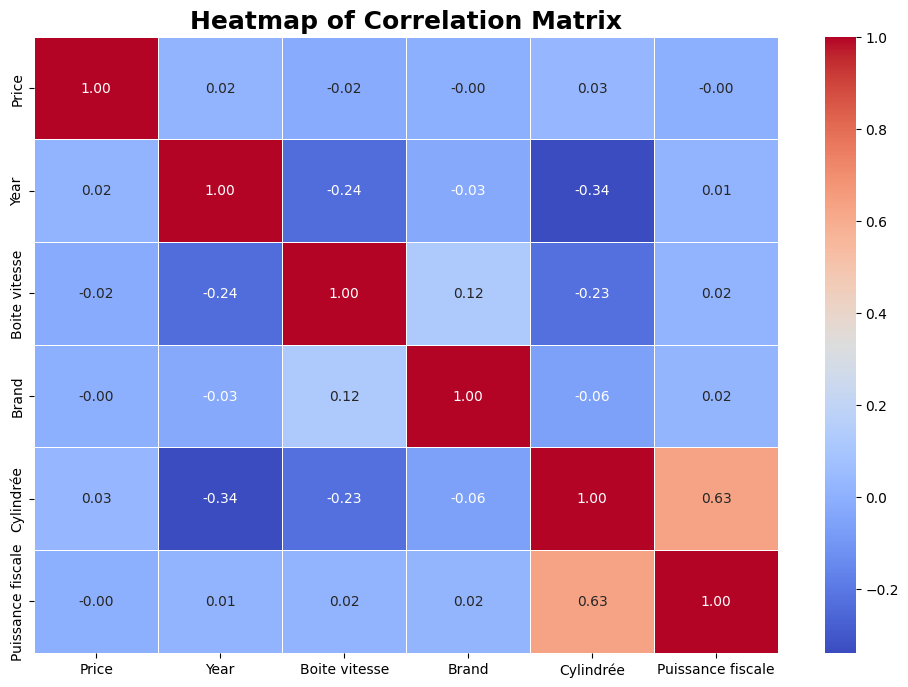

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset
file_path = 'dataversionfinal2.xlsx'  # Remplacez par le chemin correct
data = pd.read_excel(file_path)

# Nettoyer les colonnes et préparer les données
data['Price'] = pd.to_numeric(data['Price'].str.replace('[^\d.]', '', regex=True), errors='coerce')
data['Year'] = pd.to_datetime(data['Mise en circulation'], errors='coerce').dt.year
data['Boite vitesse'] = data['Boite vitesse'].astype('category').cat.codes
data['Brand'] = data['Brand'].astype('category').cat.codes
data['Cylindrée'] = pd.to_numeric(data['Cylindrée'].str.replace('[^\d.]', '', regex=True), errors='coerce')
data['Puissance fiscale'] = pd.to_numeric(data['Puissance fiscale'].str.replace('[^\d.]', '', regex=True), errors='coerce')

# Sélection des colonnes numériques
filtered_data = data[['Price', 'Year', 'Boite vitesse', 'Brand', 'Cylindrée', 'Puissance fiscale']]

# Calculer la matrice de corrélation
correlation_matrix = filtered_data.corr()

# Afficher la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=18, fontweight='bold')
plt.show()



# ***BOXPLOT***

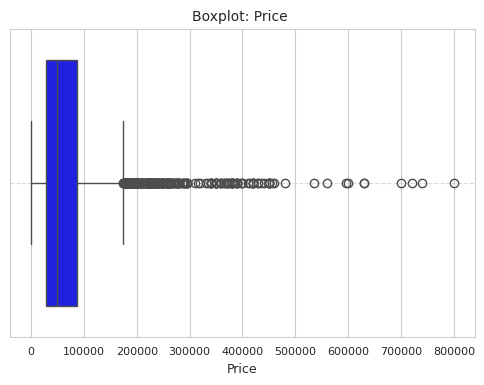

In [ ]:
# ------------------------------------
# 1. Boxplot : Price (Couleur : Bleu)
# ------------------------------------
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=data[data['Price'] < 1e6], color='blue')  # Limiter Price à moins de 1 million
plt.title('Boxplot: Price ', fontsize=10)
plt.xlabel('Price', fontsize=9)
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


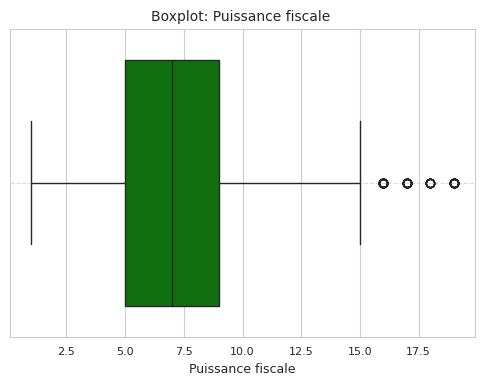

In [ ]:
# ------------------------------------
# 2. Boxplot : Puissance fiscale (Couleur : Vert)
# ------------------------------------
plt.figure(figsize=(6, 4))
sns.boxplot(x='Puissance fiscale', data=data[data['Puissance fiscale'] < 20], color='green')  # Limiter Puissance fiscale
plt.title('Boxplot: Puissance fiscale ', fontsize=10)
plt.xlabel('Puissance fiscale', fontsize=9)
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ***Checking the NULL values***

In [ ]:
import pandas as pd

# Charger le dataset
file_path = 'dataversionfinal2.xlsx'  # Remplacez par le bon chemin
data = pd.read_excel(file_path)

# Vérifier les valeurs manquantes
print("### Vérification des valeurs manquantes ###")
missing_values = data.isnull().sum()
print(missing_values)

### Vérification des valeurs manquantes ###
Brand                    86
Model                    87
Price                     0
Boite vitesse           934
Carrosserie            1120
Couleur extérieure      945
Cylindrée              1743
Gouvernorat             186
Génération              478
Kilométrage             115
Mise en circulation    1070
Nombre de places       1268
Nombre de portes       1180
Puissance fiscale       934
Sellerie               1741
Transmission           1685
Énergie                  86
dtype: int64


In [ ]:
# ============================================
# Remplissage des Valeurs Manquantes pour 'Boite vitesse'
# ============================================

# Étape 1 : Vérifier les valeurs manquantes dans la colonne
print("\n### Vérification des valeurs manquantes dans 'Boite vitesse' ###")
print(f"Valeurs manquantes avant remplissage : {data['Boite vitesse'].isnull().sum()}")

# Étape 2 : Calculer le mode (valeur la plus fréquente) pour 'Boite vitesse'
mode_bv = data['Boite vitesse'].mode()[0]
print(f"Le mode (valeur la plus fréquente) de 'Boite vitesse' est : {mode_bv}")

# Étape 3 : Remplacer les valeurs manquantes par le mode
data.loc[data['Boite vitesse'].isnull(), 'Boite vitesse'] = mode_bv

# Étape 4 : Vérifier les valeurs manquantes après remplissage
print("\n### Vérification après remplissage ###")
print(f"Valeurs manquantes après remplissage : {data['Boite vitesse'].isnull().sum()}")

# Étape 5 : Afficher la répartition des valeurs dans la colonne
print("\n### Répartition des valeurs dans 'Boite vitesse' ###")
print(data['Boite vitesse'].value_counts())
# ============================================
# Remplir les Colonnes Restantes avec des Valeurs Manquantes
# ============================================
# ============================================
# Remplir Toutes les Colonnes Restantes avec des Valeurs Manquantes
# ============================================

# 1. Colonnes numériques : Nettoyer et remplir avec la médiane
num_cols = ['Kilométrage', 'Cylindrée', 'Nombre de places', 'Nombre de portes', 'Puissance fiscale']
for col in num_cols:
    if col in data.columns:
        # Vérifier si la colonne contient des chaînes et les nettoyer
        if data[col].dtype == 'object':
            data[col] = data[col].str.extract('(\d+)', expand=False)
        # Convertir en numérique
        data[col] = pd.to_numeric(data[col], errors='coerce')
        # Calculer la médiane après conversion
        median_value = data[col].median()
        # Remplir les valeurs manquantes avec la médiane
        data[col].fillna(median_value, inplace=True)
        print(f"Colonne numérique '{col}' nettoyée et remplie avec la médiane ({median_value})")

# 2. Colonnes catégorielles : Remplir avec le mode
cat_cols = ['Carrosserie', 'Couleur extérieure', 'Génération', 'Transmission', 'Énergie', 'Sellerie', 'Gouvernorat']
for col in cat_cols:
    if col in data.columns:
        # Calculer le mode
        mode_value = data[col].mode()[0]
        # Remplir les valeurs manquantes avec le mode
        data[col].fillna(mode_value, inplace=True)
        print(f"Colonne catégorielle '{col}' remplie avec le mode ({mode_value})")

# 3. Colonne spéciale : 'Mise en circulation'
if 'Mise en circulation' in data.columns:
    # Convertir en format datetime
    data['Mise en circulation'] = pd.to_datetime(data['Mise en circulation'], errors='coerce')
    # Remplir les valeurs manquantes avec une date fictive
    default_date = pd.Timestamp('2000-01-01')
    data['Mise en circulation'].fillna(default_date, inplace=True)
    print(f"Colonne 'Mise en circulation' remplie avec la date par défaut ({default_date})")

# 4. Colonnes restantes : 'Brand' et 'Model'
# Ces colonnes peuvent également être remplies avec le mode si elles sont catégorielles
if 'Brand' in data.columns:
    mode_brand = data['Brand'].mode()[0]
    data['Brand'].fillna(mode_brand, inplace=True)
    print(f"Colonne 'Brand' remplie avec le mode ({mode_brand})")

if 'Model' in data.columns:
    mode_model = data['Model'].mode()[0]
    data['Model'].fillna(mode_model, inplace=True)
    print(f"Colonne 'Model' remplie avec le mode ({mode_model})")

# 5. Vérification des valeurs manquantes restantes
print("\n### Vérification Finale des Valeurs Manquantes ###")
print(data.isnull().sum())

# 6. Aperçu des données après traitement
print("\n### Aperçu des premières lignes après traitement ###")
print(data.head())


### Vérification des valeurs manquantes dans 'Boite vitesse' ###
Valeurs manquantes avant remplissage : 934
Le mode (valeur la plus fréquente) de 'Boite vitesse' est : Automatique

### Vérification après remplissage ###
Valeurs manquantes après remplissage : 0

### Répartition des valeurs dans 'Boite vitesse' ###
Boite vitesse
Automatique    2382
Manuelle       1254
Mécanique       148
Name: count, dtype: int64
Colonne numérique 'Kilométrage' nettoyée et remplie avec la médiane (35000.0)
Colonne numérique 'Cylindrée' nettoyée et remplie avec la médiane (1500.0)
Colonne numérique 'Nombre de places' nettoyée et remplie avec la médiane (5.0)
Colonne numérique 'Nombre de portes' nettoyée et remplie avec la médiane (5.0)
Colonne numérique 'Puissance fiscale' nettoyée et remplie avec la médiane (7.0)
Colonne catégorielle 'Carrosserie' remplie avec le mode (SUV/4x4)
Colonne catégorielle 'Couleur extérieure' remplie avec le mode (Noir)
Colonne catégorielle 'Génération' remplie avec le mode (2

# ***Creating a new column***

Colonne 'Present Year' ajoutée avec succès.
Colonne 'Years Of Manufacture' calculée avec succès.
Colonne 'Present Year' supprimée.


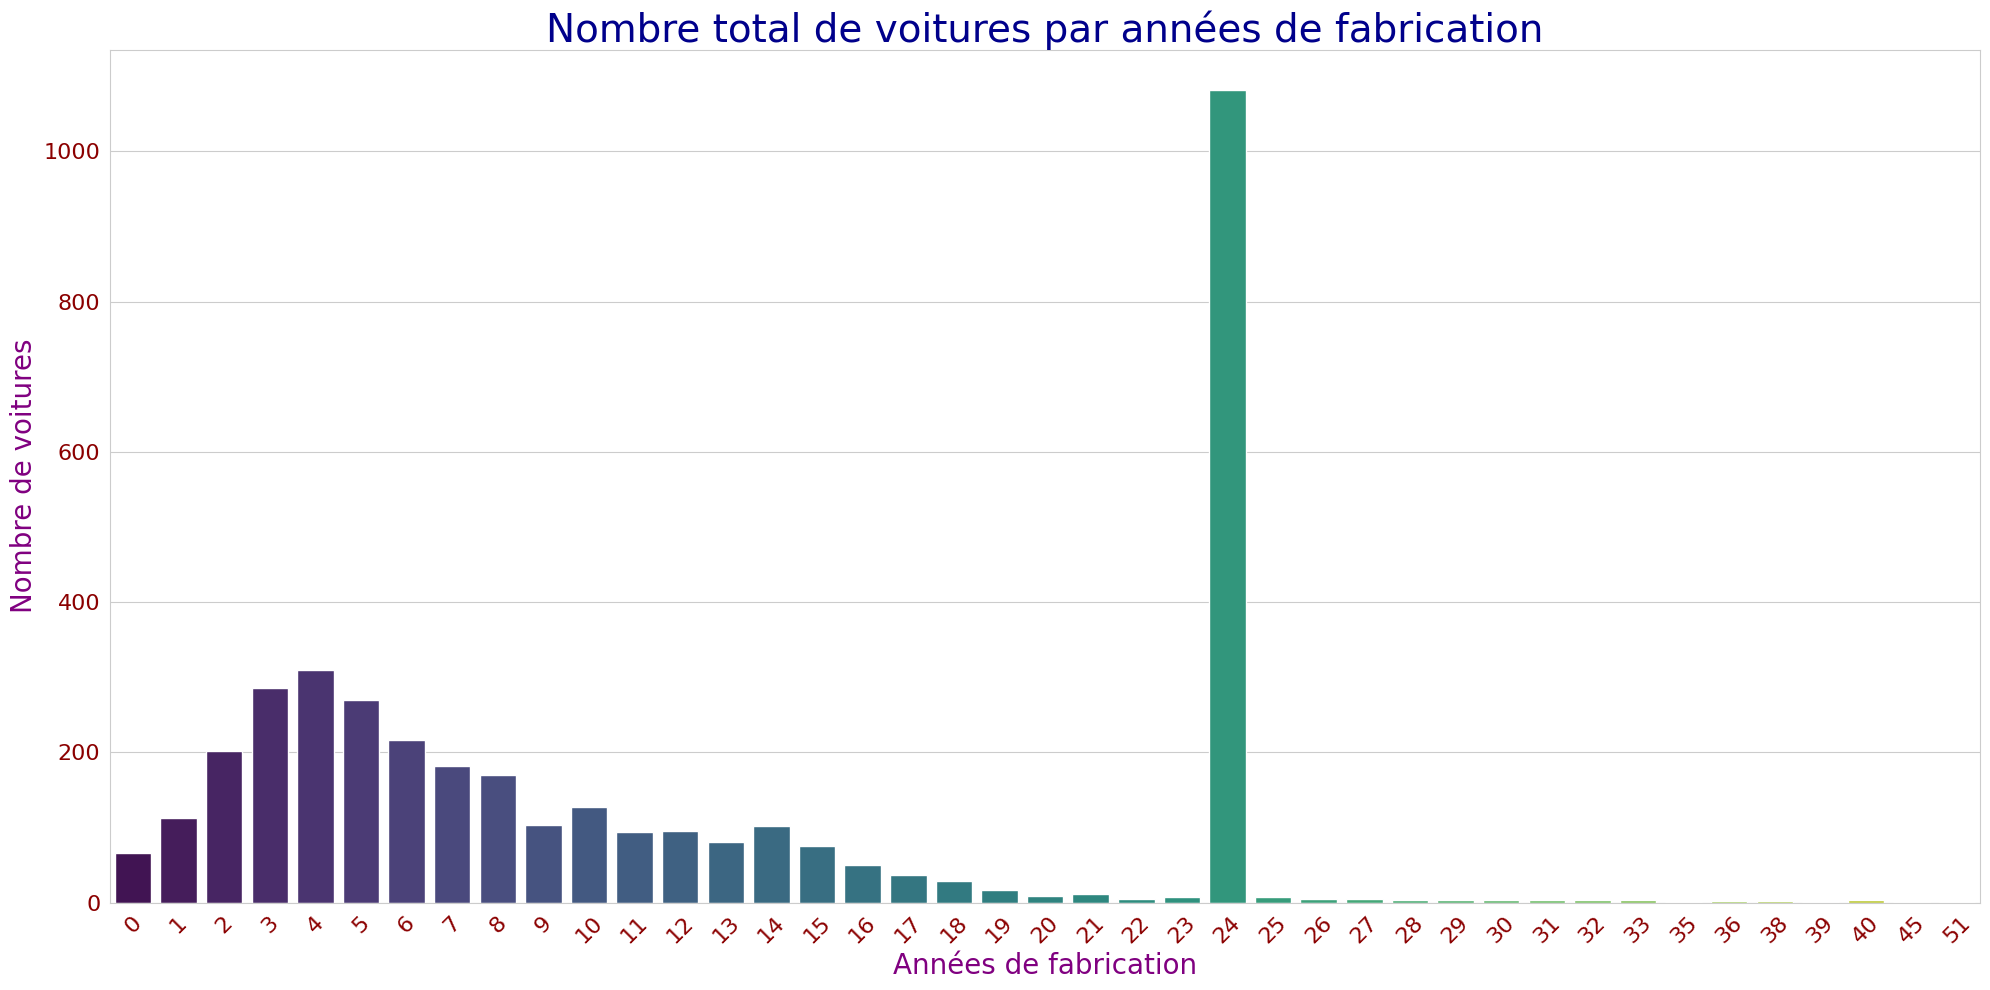

Le dataset nettoyé a été sauvegardé sous 'dataset_nettoye_sans_valeurs_manquantes.xlsx'.


In [ ]:
# ============================================
# 1. Création de la colonne 'Present Year'
# ============================================
data['Present Year'] = 2024
print("Colonne 'Present Year' ajoutée avec succès.")

# ============================================
# 2. Calcul de 'Years Of Manufacture'
# ============================================
if 'Mise en circulation' in data.columns:
    data['Mise en circulation'] = pd.to_datetime(data['Mise en circulation'], errors='coerce')
    data['Years Of Manufacture'] = data['Present Year'] - data['Mise en circulation'].dt.year
    print("Colonne 'Years Of Manufacture' calculée avec succès.")

# Supprimer 'Present Year' car elle est temporaire
data.drop(['Present Year'], axis=1, inplace=True)
print("Colonne 'Present Year' supprimée.")

# ============================================
# 3. Visualisation : Barplot des 'Years Of Manufacture'
# ============================================
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot avec personnalisation améliorée
plt.figure(figsize=(20, 10))  # Taille augmentée
sns.barplot(
    y=data['Years Of Manufacture'].value_counts(),
    x=data['Years Of Manufacture'].value_counts().index,
    palette="viridis"  # Dégradé de couleurs (palette 'viridis')
)
plt.title("Nombre total de voitures par années de fabrication", fontsize=28, color='darkblue')
plt.xlabel("Années de fabrication", fontsize=20, color='purple')
plt.ylabel("Nombre de voitures", fontsize=20, color='purple')
plt.xticks(fontsize=16, rotation=45, color='darkred')  # Ajuster la taille et incliner les étiquettes X
plt.yticks(fontsize=16, color='darkred')

# Ajustement de la mise en page pour éviter le chevauchement
plt.tight_layout()
plt.show()
# Optionnel : Sauvegarder le dataset nettoyé
data.to_excel('dataset_nettoye_sans_valeurs_manquantes.xlsx', index=False)
print("Le dataset nettoyé a été sauvegardé sous 'dataset_nettoye_sans_valeurs_manquantes.xlsx'.")


# **Handling Outliers**

In [ ]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_excel('dataset_nettoye_sans_valeurs_manquantes.xlsx')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean 'Price' column: Remove non-numeric characters and spaces
df['Price'] = df['Price'].str.replace(r'[^0-9.]', '', regex=True)  # Keep only numbers and dots

# Convert cleaned 'Price' to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Verify changes
print("Cleaned 'Price' column sample:")
print(df['Price'].head(10))

print("Descriptive statistics of 'Price':")
print(df['Price'].describe())


Cleaned 'Price' column sample:
0      230000.0
1    36086000.0
2       49500.0
3       54000.0
4       76500.0
5      189000.0
6       76000.0
7      101000.0
8       39900.0
9       38500.0
Name: Price, dtype: float64
Descriptive statistics of 'Price':
count    3.756000e+03
mean     3.265144e+09
std      1.139979e+11
min      1.000000e+00
25%      2.800000e+04
50%      5.100000e+04
75%      9.200000e+04
max      5.500000e+12
Name: Price, dtype: float64


In [ ]:
# Fill NaN values with the median price
df['Price'].fillna(df['Price'].median(), inplace=True)

# Check the final status of the column
print("Final descriptive statistics for 'Price':")
print(df['Price'].describe())


Final descriptive statistics for 'Price':
count    3.784000e+03
mean     3.240984e+09
std      1.135756e+11
min      1.000000e+00
25%      2.800000e+04
50%      5.100000e+04
75%      9.112500e+04
max      5.500000e+12
Name: Price, dtype: float64


In [ ]:
# Count the number of zero values
num_zeros = (df['Price'] == 0).sum()
print(f"Number of zero values in Price: {num_zeros}")

# Display rows where Price is zero
print("Rows with Price = 0:")
print(df[df['Price'] == 0].head())


Number of zero values in Price: 0
Rows with Price = 0:
Empty DataFrame
Columns: [Brand, Model, Price, Boite vitesse, Carrosserie, Couleur extérieure, Cylindrée, Gouvernorat, Génération, Kilométrage, Mise en circulation, Nombre de places, Nombre de portes, Puissance fiscale, Sellerie, Transmission, Énergie, Years Of Manufacture]
Index: []


In [ ]:
# Remove rows where Price is 1.0
df = df[df['Price'] > 1.0]

# Verify the change
print("Minimum Price after removing 1.0 values:", df['Price'].min())

# Calculate IQR and bounds for Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print bounds
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Set a logical minimum price threshold
logical_min_price = 20000

# Remove outliers based on IQR and logical minimum threshold
filtered_df = df[(df['Price'] >= logical_min_price) & (df['Price'] <= upper_bound)]

# Print results
print(f"Original size: {df.shape[0]}")
print(f"Filtered size: {filtered_df.shape[0]}")
print(f"Minimum Price after filtering: {filtered_df['Price'].min()}")





Minimum Price after removing 1.0 values: 2.0
Lower Bound: -66750.0
Upper Bound: 191250.0
Original size: 3683
Filtered size: 2853
Minimum Price after filtering: 20000.0


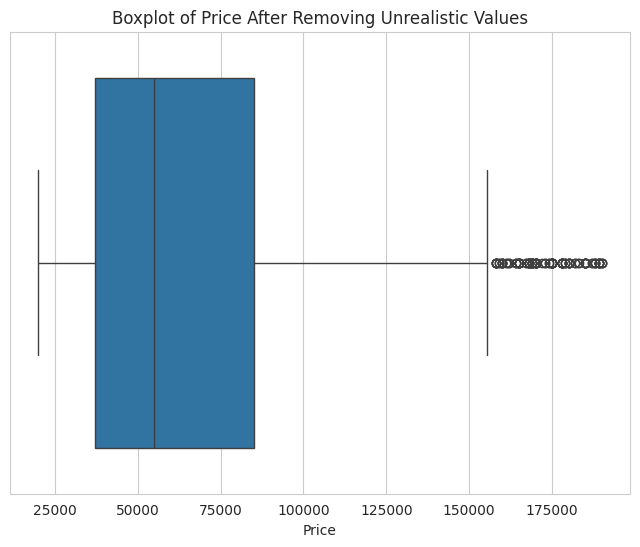

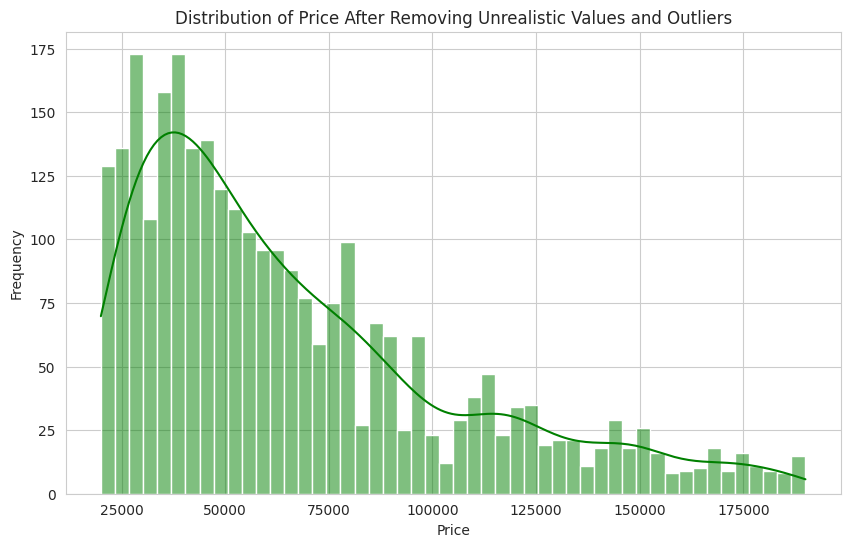

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot to confirm the results
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['Price'])
plt.title('Boxplot of Price After Removing Unrealistic Values')
plt.show()

# Plot histogram after filtering
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Price'], kde=True, color='green', bins=50)
plt.title('Distribution of Price After Removing Unrealistic Values and Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



# ***3.Manipulation of Data***

**Shuffling the data**



It is very important to shuffle the data randomly so that we get outputs differently and we would be dealing with data without any particular order or a particular time frame.

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# 1. Lire le dataset nettoyé
file_path = 'dataset_nettoye_sans_valeurs_manquantes.xlsx'
data = pd.read_excel(file_path)

# Vérification de la structure des données
print("Aperçu des premières lignes du dataset :")
print(data.head())

# 2. Shuffling des données
shuffled_data = shuffle(data, random_state=100)

# 3. Préparation des variables X (features) et y (target)
if 'Price' in shuffled_data.columns:  # Assurez-vous que la colonne cible existe
    X = shuffled_data.drop(['Price'], axis=1)  # Features : toutes les colonnes sauf 'Price'
    y = shuffled_data['Price']  # Target : la colonne 'Price'

    # Afficher les formes de X et y
    print("\nDimensions des données après séparation :")
    print(f"X (features) : {X.shape}")
    print(f"y (target) : {y.shape}")
else:
    print("Erreur : La colonne 'Price' n'existe pas dans le dataset.")

Aperçu des premières lignes du dataset :
           Brand     Model         Price Boite vitesse Carrosserie  \
0  Mercedes-Benz  Classe C     230 000DT   Automatique     Berline   
1      Wallyscar       719  36 086 000DT      Manuelle     Berline   
2           Seat   Leon SC      49 500DT      Manuelle       Coupé   
3           Fiat       500      54 000DT      Manuelle       Coupé   
4          Haval        H6      76 500DT   Automatique     SUV/4x4   

  Couleur extérieure  Cylindrée Gouvernorat  \
0         Gris Shark       1500    BenArous   
1               Noir       1600      Sousse   
2    Gris anthracite       1200     Bizerte   
3        Gris argent        999      Sousse   
4               Noir       1500      Nabeul   

                               Génération  Kilométrage Mise en circulation  \
0      (206) Berline03/2021 - Aujourd'hui         7300          2022-11-01   
1                   12/2022 - Aujourd'hui        87564          2023-02-01   
2  III (5F5) SC 3 por

Now that we have shuffled and prepared the data, it is time to divide it into training data and testing data. Typically, we divide the data into an 80:20 split, where 80% of the data is used for training and 20% is reserved for testing. This ensures that the machine learning model is trained on a significant portion of the data while still having enough unseen data for testing.

The train_test_split function from Scikit-learn allows us to split the data randomly.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

# Printing the dimensions of the training and testing sets
print("### Data Split Summary ###")
print("The size of the input training data is: {}".format(X_train.shape))
print("The size of the output training data is: {}".format(y_train.shape))
print("The size of the input testing data is: {}".format(X_test.shape))
print("The size of the output testing data is: {}".format(y_test.shape))


### Data Split Summary ###
The size of the input training data is: (3027, 17)
The size of the output training data is: (3027,)
The size of the input testing data is: (757, 17)
The size of the output testing data is: (757,)


## Encoding the Categorical Data using One-Hot Encoding :

In this step, we need to convert the categorical features (text-based columns) into numerical values, as machine learning models cannot work directly with text data.

For this purpose, we will use One-Hot Encoding, which creates binary columns (0 or 1) for each category of the categorical features. This approach ensures that no ordinal relationship is assumed between the categories.





Identifying Categorical Columns

In [ ]:
# Identification des colonnes
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Colonnes catégorielles :", list(categorical_columns))
print("Colonnes numériques :", list(numerical_columns))


Colonnes catégorielles : ['Brand', 'Model', 'Price', 'Boite vitesse', 'Carrosserie', 'Couleur extérieure', 'Gouvernorat', 'Génération', 'Sellerie', 'Transmission', 'Énergie']
Colonnes numériques : ['Cylindrée', 'Kilométrage', 'Nombre de places', 'Nombre de portes', 'Puissance fiscale', 'Years Of Manufacture']


**Step 2: Ensure Consistency of Data Types**

In [ ]:
# Colonnes catégorielles pour l'encodage, y compris Price
categorical_columns = ['Brand', 'Model', 'Boite vitesse', 'Carrosserie',
                       'Couleur extérieure', 'Gouvernorat', 'Génération',
                       'Sellerie', 'Transmission', 'Énergie']

# Convertir toutes les colonnes catégorielles en string
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

print("\n### Consistance des types assurée ###")
print(X_train.dtypes)



### Consistance des types assurée ###
Brand                           object
Model                           object
Boite vitesse                   object
Carrosserie                     object
Couleur extérieure              object
Cylindrée                        int64
Gouvernorat                     object
Génération                      object
Kilométrage                      int64
Mise en circulation     datetime64[ns]
Nombre de places                 int64
Nombre de portes                 int64
Puissance fiscale                int64
Sellerie                        object
Transmission                    object
Énergie                         object
Years Of Manufacture             int64
dtype: object


**Step 3: Apply One Hot Encoding**


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialiser le OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Appliquer l'encodage
encoded_train = encoder.fit_transform(X_train[categorical_columns])
encoded_test = encoder.transform(X_test[categorical_columns])

# Convertir en DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test.index)

# Concaténer les colonnes encodées avec les colonnes numériques
X_train = pd.concat([X_train.drop(columns=categorical_columns), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_columns), encoded_test_df], axis=1)

print("\n### Données après encodage One-Hot ###")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")



### Données après encodage One-Hot ###
X_train shape : (3027, 1473)
X_test shape : (757, 1473)


In [ ]:
# Vérifier les types de données
print("\n### Vérification des types de colonnes après encodage ###")
print(X_train.dtypes.value_counts())

# Afficher un aperçu des données encodées
print("\nAperçu des premières lignes après encodage :")
print(X_train.head())



### Vérification des types de colonnes après encodage ###
float64           1466
int64                6
datetime64[ns]       1
Name: count, dtype: int64

Aperçu des premières lignes après encodage :
      Cylindrée  Kilométrage Mise en circulation  Nombre de places  \
398        1400       147985          2011-08-01                 5   
1361       1496        32178          2022-12-01                 5   
445        1000       115000          2020-10-01                 5   
1452       1600        50000          2022-09-01                 5   
2924       1500           25          2000-01-01                 5   

      Nombre de portes  Puissance fiscale  Years Of Manufacture  \
398                  4                  5                    13   
1361                 4                 11                     2   
445                  4                  5                     4   
1452                 4                  8                     2   
2924                 5                  7   

# ***PLOTS***

**1. Countplot of Different Car Companies**

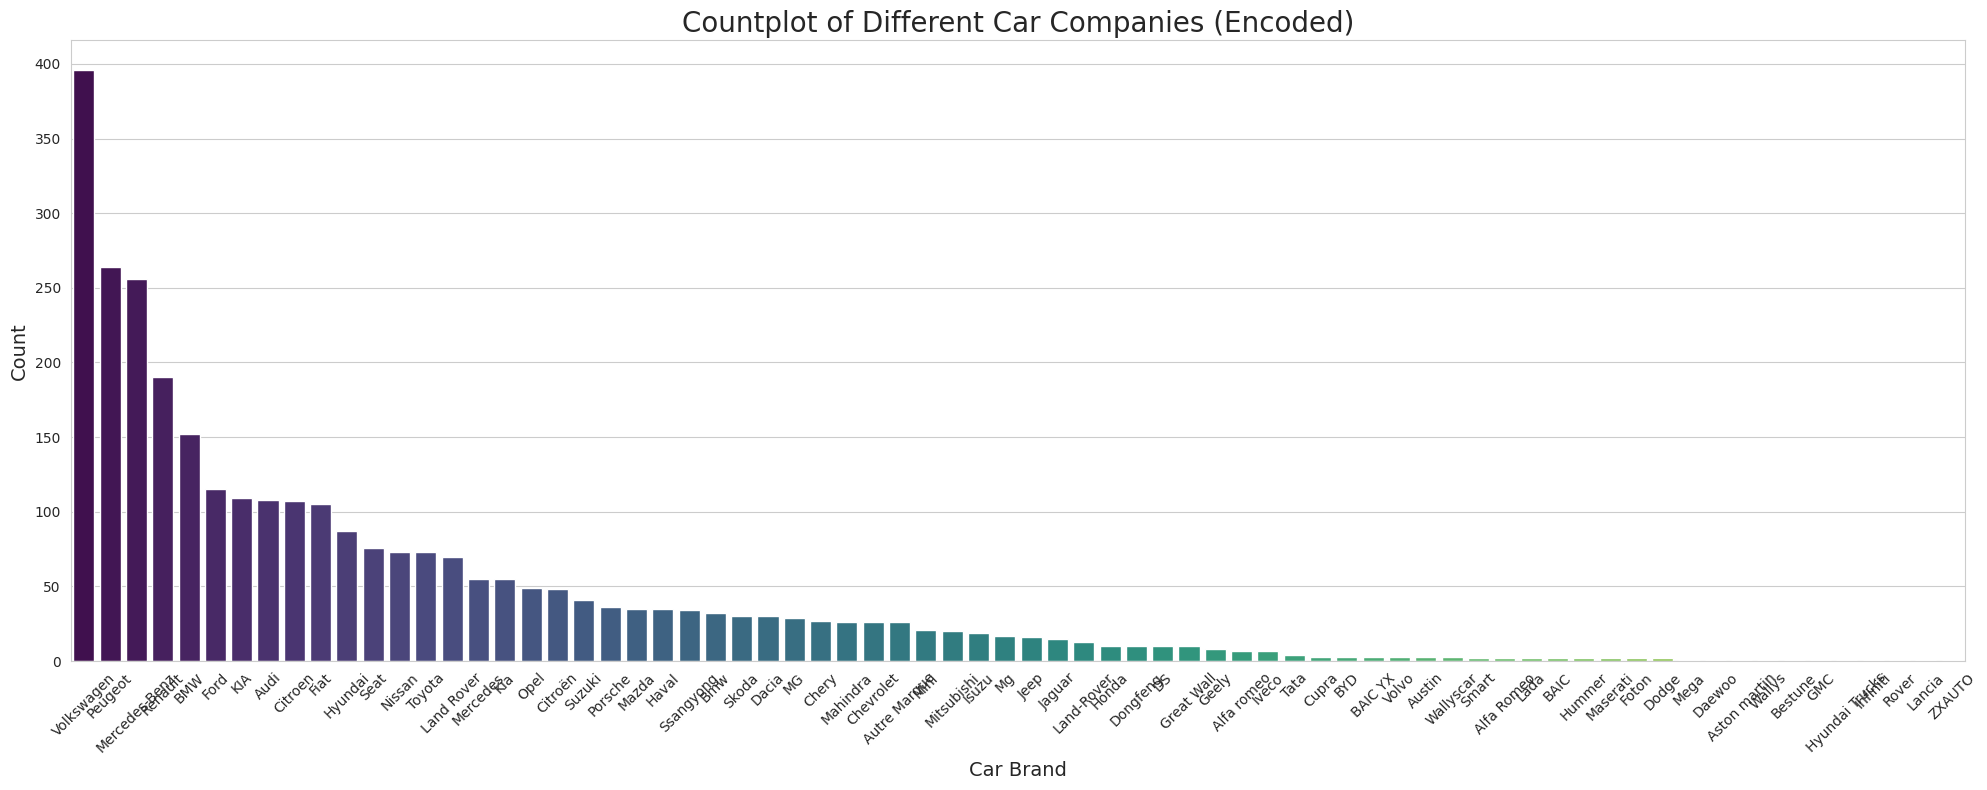

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check if 'Brand' has been encoded into multiple columns
encoded_brand_columns = [col for col in X_train.columns if 'Brand_' in col]

# Aggregate counts for each brand
brand_counts = X_train[encoded_brand_columns].sum().sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(20, 8))
sns.barplot(x=brand_counts.index.str.replace("Brand_", ""), y=brand_counts.values, palette="viridis")
plt.title("Countplot of Different Car Companies (Encoded)", fontsize=20)
plt.xlabel("Car Brand", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**2. Counting the Cars Based on Transmission Type**

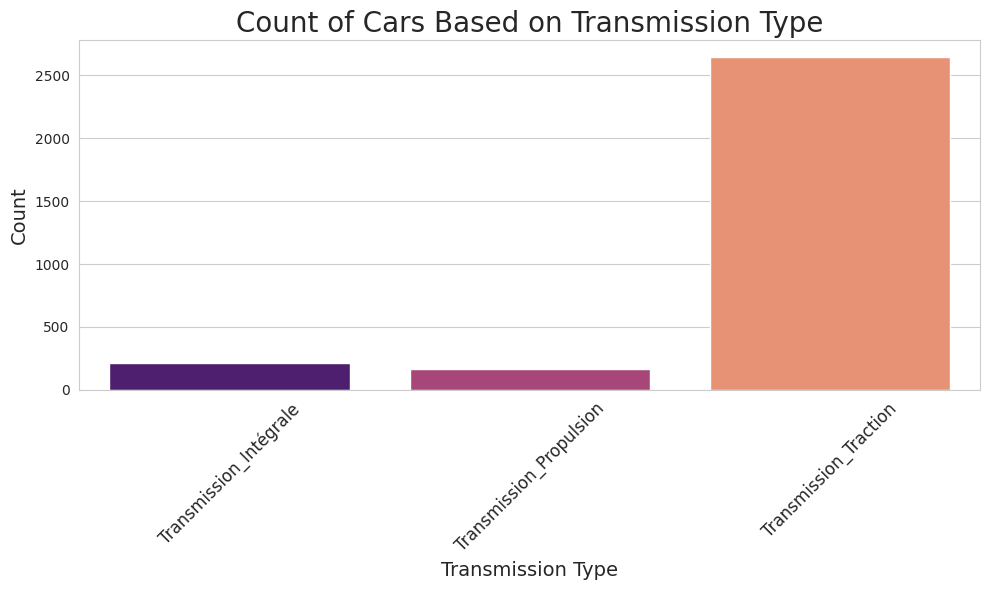

In [ ]:
#corriger ca aprés
# Identify columns for 'Transmission'
transmission_columns = [col for col in X_train.columns if 'Transmission_' in col]

# Sum up the counts for Transmission types
transmission_counts = X_train[transmission_columns].sum()

# Plot Transmission counts
plt.figure(figsize=(10, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='magma')

plt.title("Count of Cars Based on Transmission Type", fontsize=20)
plt.xlabel("Transmission Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()



### **4. Countplot of Engine Fuel Type**


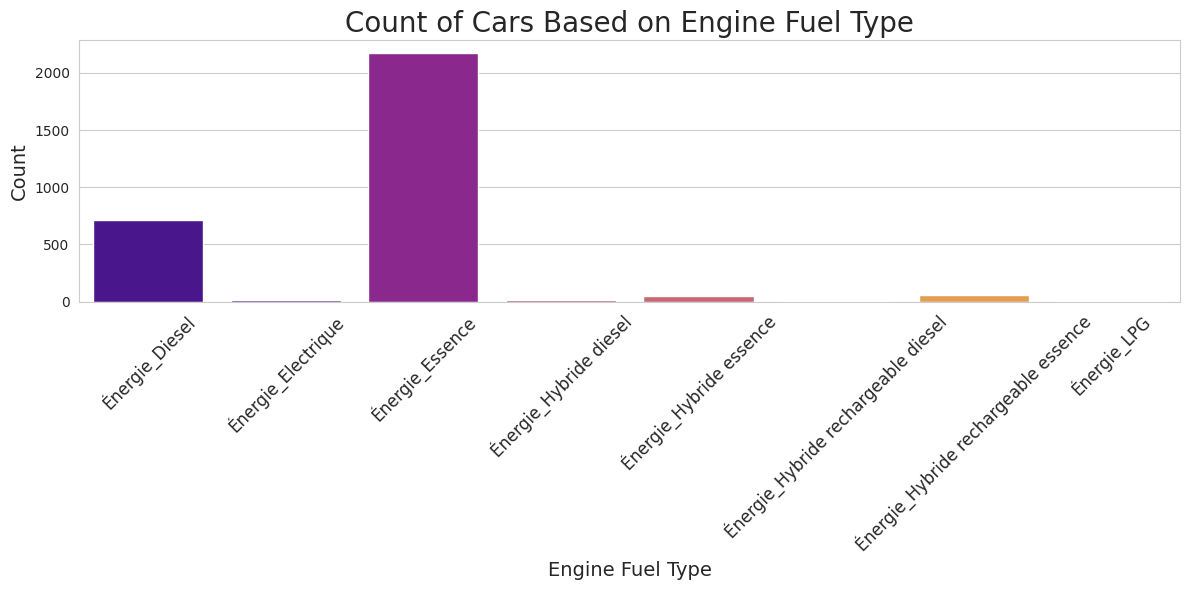

In [ ]:
# Identify columns for 'Énergie'
fuel_columns = [col for col in X_train.columns if 'Énergie_' in col]

# Sum up the counts for fuel types
fuel_counts = X_train[fuel_columns].sum()

# Plot fuel type counts
plt.figure(figsize=(12, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='plasma')

plt.title("Count of Cars Based on Engine Fuel Type", fontsize=20)
plt.xlabel("Engine Fuel Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


**6. Heatmap of Correlation Between Numerical Columns**


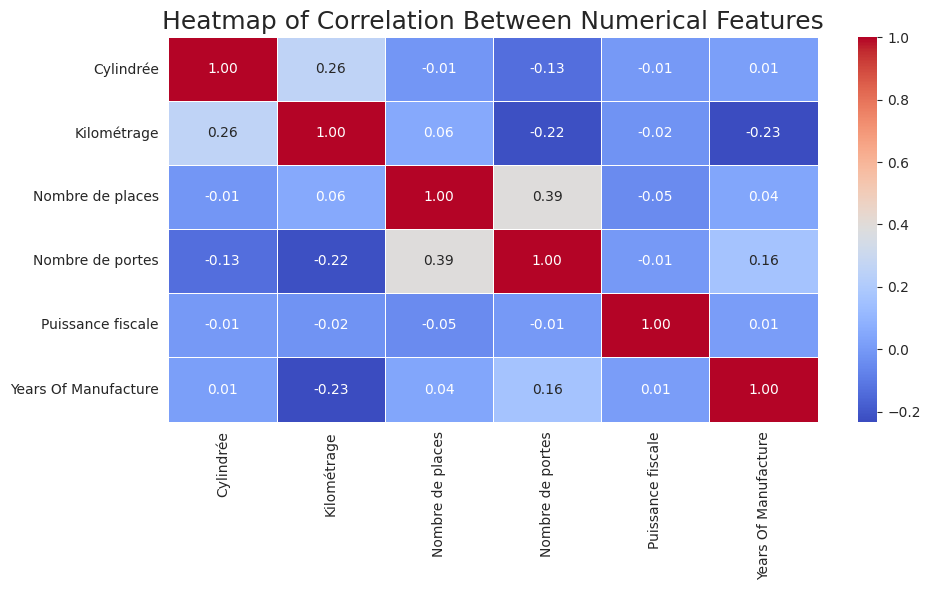

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only truly numerical columns (exclude binary encoded columns)
true_numeric_columns = ['Cylindrée', 'Kilométrage', 'Nombre de places',
                        'Nombre de portes', 'Puissance fiscale', 'Years Of Manufacture']

# Compute the correlation matrix
correlation_matrix = X_train[true_numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Correlation Between Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()


### **3. Normalisation ou Standardisation**

Before feeding the data to machine learning algorithms, it is essential to scale or normalize the features. This ensures that all features contribute equally to the model and prevents any single feature with larger values from dominating the results. For this purpose, we use the MinMaxScaler, which transforms the values to a specified range, typically between 0 and 1.



**Step 1: Import Required Library**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Step 2: Fit and Transform the Data**

The scaler is fitted to the training data and used to transform both the training set and test set. This ensures consistency in scaling.

In [ ]:

# Step 1: Identify numeric columns (exclude datetime and object types)
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Step 2: Extract only numeric data for scaling
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

In [ ]:
# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [ ]:
# Step 4: Convert back to DataFrame for clarity
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns, index=X_test.index)


In [ ]:
# Verify the shapes and data
print("Scaled X_train shape:", X_train_scaled_df.shape)
print("Scaled X_test shape:", X_test_scaled_df.shape)
print("Scaled Training Data Overview:")
print(X_train_scaled_df.head())

Scaled X_train shape: (3027, 1472)
Scaled X_test shape: (757, 1472)
Scaled Training Data Overview:
      Cylindrée  Kilométrage  Nombre de places  Nombre de portes  \
398    0.082268     0.147985          0.428571              0.50   
1361   0.098001     0.032178          0.428571              0.50   
445    0.016716     0.115000          0.428571              0.50   
1452   0.115044     0.050000          0.428571              0.50   
2924   0.098656     0.000025          0.428571              0.75   

      Puissance fiscale  Years Of Manufacture  Brand_Alfa Romeo  \
398        4.390244e-07              0.254902               0.0   
1361       1.097561e-06              0.039216               0.0   
445        4.390244e-07              0.078431               0.0   
1452       7.682928e-07              0.039216               0.0   
2924       6.585367e-07              0.470588               0.0   

      Brand_Alfa romeo  Brand_Aston martin  Brand_Audi  ...  \
398                0.0    

**Check the Minimum and Maximum Values of Each Column**

In [ ]:
print("Verification of minimum and maximum values after MinMaxScaler:\n")

print("Minimum values after scaling:\n", X_train_scaled_df.min())
print("\nMaximum values after scaling:\n", X_train_scaled_df.max())


Verification of minimum and maximum values after MinMaxScaler:

Minimum values after scaling:
 Cylindrée                               0.0
Kilométrage                             0.0
Nombre de places                        0.0
Nombre de portes                        0.0
Puissance fiscale                       0.0
                                       ... 
Énergie_Hybride diesel                  0.0
Énergie_Hybride essence                 0.0
Énergie_Hybride rechargeable diesel     0.0
Énergie_Hybride rechargeable essence    0.0
Énergie_LPG                             0.0
Length: 1472, dtype: float64

Maximum values after scaling:
 Cylindrée                               1.0
Kilométrage                             1.0
Nombre de places                        1.0
Nombre de portes                        1.0
Puissance fiscale                       1.0
                                       ... 
Énergie_Hybride diesel                  1.0
Énergie_Hybride essence                 1.0
Énergie_

# *PLOT*

**1. Distribution of Scaled Features**


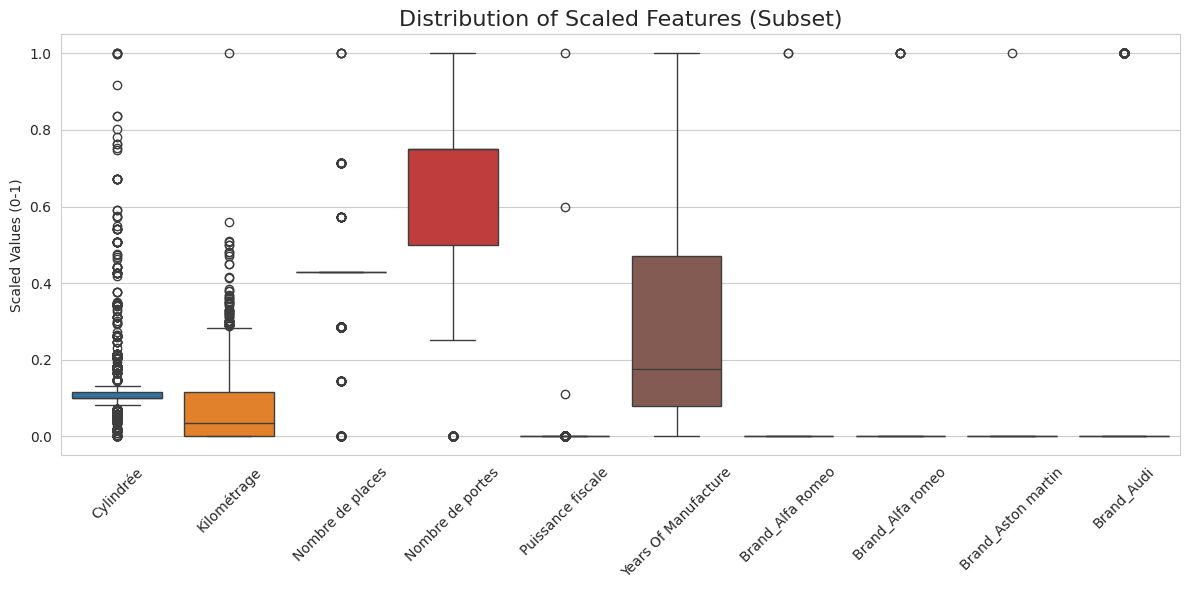

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a random subset of features to visualize
sample_features = X_train_scaled_df.columns[:10]

# Plot the distribution of scaled features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled_df[sample_features])
plt.title("Distribution of Scaled Features (Subset)", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Scaled Values (0-1)")
plt.tight_layout()
plt.show()


**2. Before vs After Scaling**

Original Kilométrage - Min: 0 Max: 999999
Scaled Kilométrage (MinMaxScaler) - Min: 0.0 Max: 0.9999999999999999


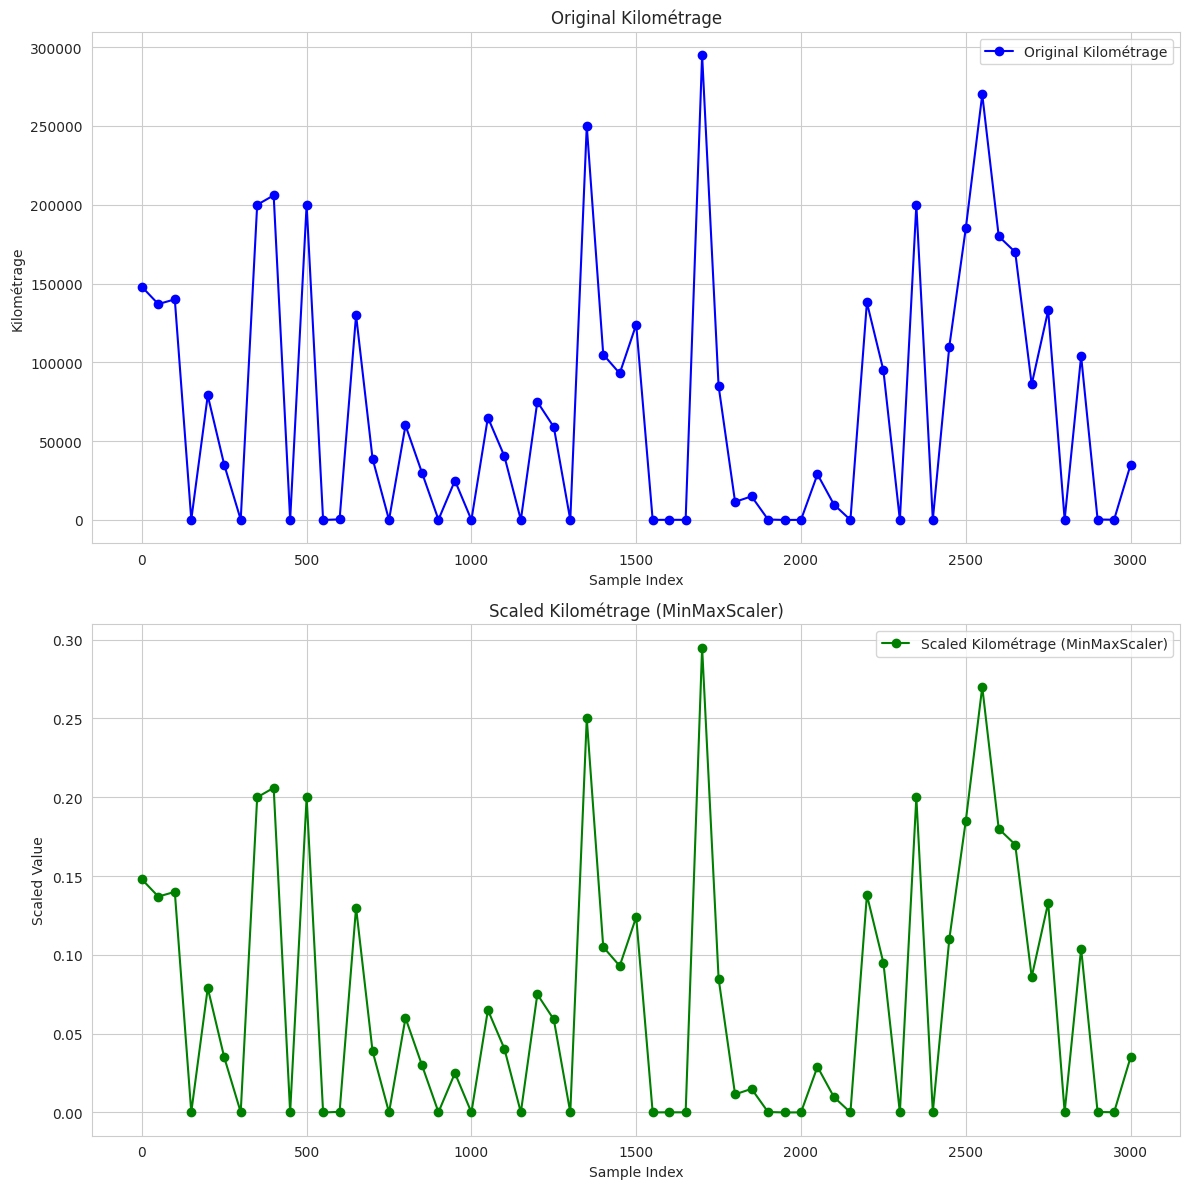

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming 'X_train_numeric' contains the original 'Kilométrage' values
# and 'X_train_scaled_df' contains the scaled values after applying MinMaxScaler

# Calculate min and max for the original Kilométrage
original_km_min = X_train_numeric['Kilométrage'].min()
original_km_max = X_train_numeric['Kilométrage'].max()

# Calculate min and max for the scaled Kilométrage
scaled_km_min = X_train_scaled_df['Kilométrage'].min()
scaled_km_max = X_train_scaled_df['Kilométrage'].max()

# Print the results
print("Original Kilométrage - Min:", original_km_min, "Max:", original_km_max)
print("Scaled Kilométrage (MinMaxScaler) - Min:", scaled_km_min, "Max:", scaled_km_max)

# Créer un sous-échantillon pour une meilleure visibilité
sample_indices = np.arange(0, len(X_train_numeric['Kilométrage']), step=50)  # Prendre un point tous les 50 échantillons
original_km = X_train_numeric['Kilométrage'].iloc[sample_indices]
scaled_km = X_train_scaled_df['Kilométrage'].iloc[sample_indices]

# Créer les graphiques de comparaison dans des subplots séparés
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot original kilométrage
ax1.plot(sample_indices, original_km, 'o-', color='blue', label="Original Kilométrage")
ax1.set_title("Original Kilométrage")
ax1.set_xlabel("Sample Index")
ax1.set_ylabel("Kilométrage")
ax1.legend()

# Plot scaled kilométrage
ax2.plot(sample_indices, scaled_km, 'o-', color='green', label="Scaled Kilométrage (MinMaxScaler)")
ax2.set_title("Scaled Kilométrage (MinMaxScaler)")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Scaled Value")
ax2.legend()

# Adjust layout for better viewing
plt.tight_layout()
plt.show()


**Scaled Values Histogram**


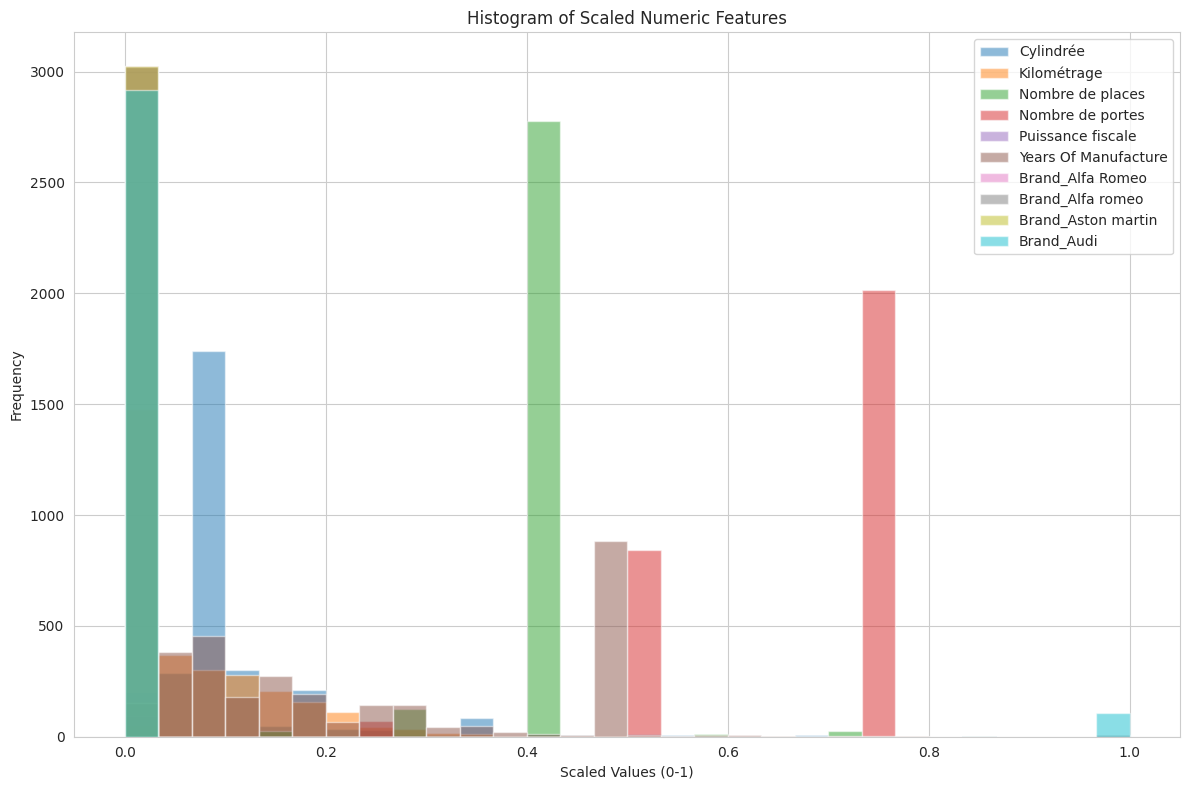

In [ ]:
import matplotlib.pyplot as plt

# Créer un histogramme pour chaque colonne numérique
plt.figure(figsize=(12, 8))  # Taille de la figure

for column in X_train_scaled_df.columns[:10]:  # Limiter à 10 colonnes pour la clarté
    plt.hist(X_train_scaled_df[column], bins=30, alpha=0.5, label=column)

# Configuration de l'affichage
plt.title("Histogram of Scaled Numeric Features")
plt.xlabel("Scaled Values (0-1)")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Feature choice**

In [ ]:
# List of column prefixes to remove
prefixes_to_remove = ['Gouvernorat', 'Sellerie', 'Couleur extérieure']

# Generate the list of columns to drop
columns_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes_to_remove)]

print("Columns to drop:", columns_to_drop)


Columns to drop: ['Couleur extérieure_Argent', 'Couleur extérieure_Au choix', 'Couleur extérieure_Aubergine', 'Couleur extérieure_Autre', 'Couleur extérieure_BLANC', 'Couleur extérieure_BLANCHE', 'Couleur extérieure_BLONC', 'Couleur extérieure_Banche', 'Couleur extérieure_Beige', 'Couleur extérieure_Blanc', 'Couleur extérieure_Blanc nacré', 'Couleur extérieure_Blanche', 'Couleur extérieure_Blant', 'Couleur extérieure_Bleu', 'Couleur extérieure_Bleu ciel', 'Couleur extérieure_Bleue', 'Couleur extérieure_Bordeaux', 'Couleur extérieure_Champagne', 'Couleur extérieure_GRIS', 'Couleur extérieure_GRIS FONCE', 'Couleur extérieure_GRIS METALLISEE', 'Couleur extérieure_Gris', 'Couleur extérieure_Gris Charbon', 'Couleur extérieure_Gris Shark', 'Couleur extérieure_Gris anthracite', 'Couleur extérieure_Gris argent', 'Couleur extérieure_Gris charbon', 'Couleur extérieure_Gris foncé', 'Couleur extérieure_Gris métallisé', 'Couleur extérieure_Gris shark', 'Couleur extérieure_Grise', 'Couleur extérieur

In [ ]:
# Drop the columns from X_train
X_train.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
print("Updated columns in X_train:", X_train.columns)


Updated columns in X_train: Index(['Cylindrée', 'Kilométrage', 'Mise en circulation', 'Nombre de places',
       'Nombre de portes', 'Puissance fiscale', 'Years Of Manufacture',
       'Brand_Alfa Romeo', 'Brand_Alfa romeo', 'Brand_Aston martin',
       ...
       'Transmission_Propulsion', 'Transmission_Traction', 'Énergie_Diesel',
       'Énergie_Electrique', 'Énergie_Essence', 'Énergie_Hybride diesel',
       'Énergie_Hybride essence', 'Énergie_Hybride rechargeable diesel',
       'Énergie_Hybride rechargeable essence', 'Énergie_LPG'],
      dtype='object', length=1198)


In [ ]:
# Display the shape of X_train and the first few rows to confirm changes
print("Updated X_train shape:", X_train.shape)
print(X_train.head())


Updated X_train shape: (3027, 1198)
      Cylindrée  Kilométrage Mise en circulation  Nombre de places  \
398        1400       147985          2011-08-01                 5   
1361       1496        32178          2022-12-01                 5   
445        1000       115000          2020-10-01                 5   
1452       1600        50000          2022-09-01                 5   
2924       1500           25          2000-01-01                 5   

      Nombre de portes  Puissance fiscale  Years Of Manufacture  \
398                  4                  5                    13   
1361                 4                 11                     2   
445                  4                  5                     4   
1452                 4                  8                     2   
2924                 5                  7                    24   

      Brand_Alfa Romeo  Brand_Alfa romeo  Brand_Aston martin  ...  \
398                0.0               0.0                 0.0  ...   
13

# **# Modélisation :**

# **the Gradient Boosting model**

Training the Gradient Boosting model...
### Gradient Boosting Regression with Outlier Removal ###
Mean Absolute Error (MAE): 14250.99
Root Mean Squared Error (RMSE): 21621.52
R² Score: 0.7377
Accuracy (approx): 74.91%


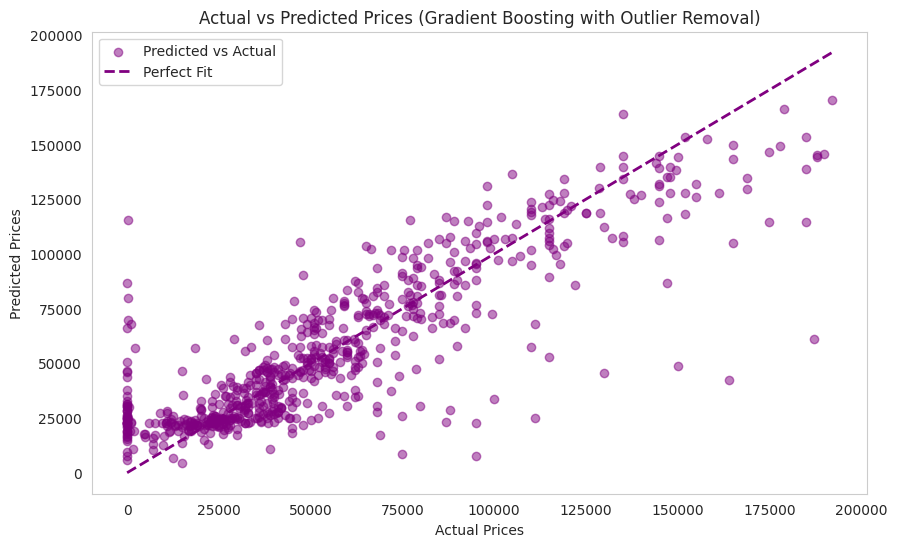

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Étape 1 : Nettoyage des cibles (y) en éliminant toutes les valeurs aberrantes
def clean_target(y):
    """Nettoie les cibles en supprimant les caractères invalides et toutes les valeurs aberrantes."""
    y = pd.to_numeric(y.str.replace(r"[^\d.]", "", regex=True), errors='coerce')
    y = y.dropna()
    Q1, Q3 = y.quantile(0.25), y.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    y = y[(y >= lower_bound) & (y <= upper_bound)]
    return y

# Nettoyage des cibles
y_train_cleaned = clean_target(y_train)
y_test_cleaned = clean_target(y_test)

# Réaligner X et y après nettoyage
X_train_reset = X_train_scaled_df.loc[y_train_cleaned.index].reset_index(drop=True)
y_train_reset = y_train_cleaned.reset_index(drop=True)
X_test_reset = X_test_scaled_df.loc[y_test_cleaned.index].reset_index(drop=True)
y_test_reset = y_test_cleaned.reset_index(drop=True)

# Étape 2 : Initialiser et entraîner GradientBoostingRegressor
print("Training the Gradient Boosting model...")
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_reset, y_train_reset)

# Étape 3 : Prédictions
y_predict = gb_model.predict(X_test_reset)

# Étape 4 : Évaluation
mae = mean_absolute_error(y_test_reset, y_predict)
rmse = np.sqrt(mean_squared_error(y_test_reset, y_predict))
r2 = r2_score(y_test_reset, y_predict)
accuracy = 1 - (mae / y_test_reset.mean())  # Approximation de l'accuracy

print("### Gradient Boosting Regression with Outlier Removal ###")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy (approx): {accuracy:.2%}")

# Étape 5 : Visualisation des prédictions avec couleur violette
plt.figure(figsize=(10, 6))

# Points en violet
plt.scatter(y_test_reset, y_predict, color='purple', alpha=0.5, label="Predicted vs Actual")

# Ligne parfaite en violet
plt.plot([y_test_reset.min(), y_test_reset.max()],
         [y_test_reset.min(), y_test_reset.max()],
         'purple', linestyle='--', lw=2, label="Perfect Fit")

# Ajout des labels et titre
plt.title("Actual vs Predicted Prices (Gradient Boosting with Outlier Removal)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Affichage des valeurs réelles et prédites
comparison_df = pd.DataFrame({
    'Actual Prices': y_test_reset,
    'Predicted Prices': y_predict
}).reset_index(drop=True)

# Afficher les 10 premières lignes
print("### Real Prices vs Predicted Prices ###")
print(comparison_df.head(10))




### Real Prices vs Predicted Prices ###
   Actual Prices  Predicted Prices
0        16500.0      19322.100508
1          240.0     115511.428348
2       192000.0     170537.220944
3        98000.0     105829.333454
4        29800.0      32754.198615
5        23000.0      29841.158112
6        75000.0      79384.139357
7        26000.0      24731.230163
8        50000.0      43436.586784
9       128500.0     130339.194471


# **K-Neighbors Regressor**

Optimizing K-Neighbors Regressor...
Best n_neighbors: 4
Training the Improved K-Neighbors Regressor model...
### Comparison of Actual and Predicted Prices (Top 10) ###
   Actual Price  Predicted Price
0       16500.0         21825.00
1         240.0         91274.25
2      192000.0        178500.00
3       98000.0        149750.00
4       29800.0         27227.75
5       23000.0         63750.00
6       75000.0        105000.00
7       26000.0         20075.00
8       50000.0         53250.00
9      128500.0        138000.00
### Improved K-Neighbors Regressor Evaluation Metrics ###
Mean Absolute Error (MAE): 18689.00
Root Mean Squared Error (RMSE): 31385.74
R² Score: 0.6773
Accuracy (improved): 72.86%


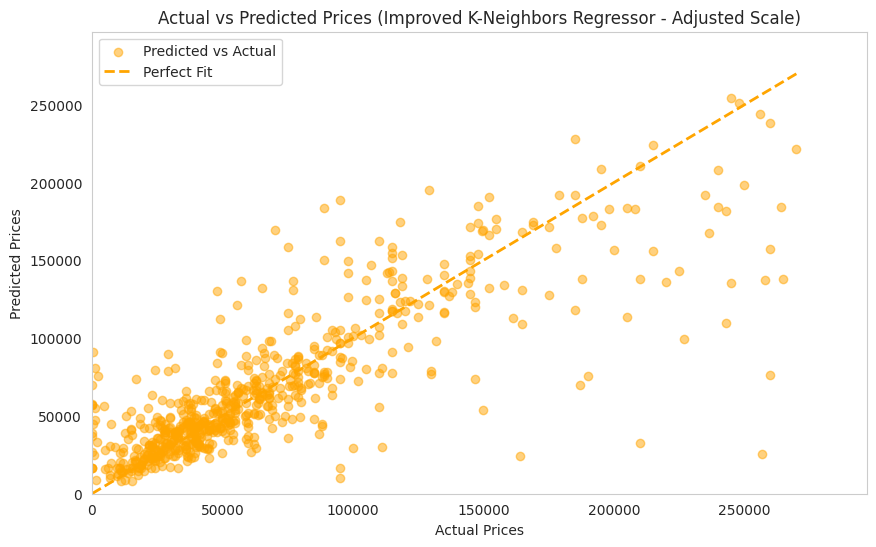

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Étape 1 : Nettoyage des cibles (y) et des indices
def clean_target(y):
    y = pd.to_numeric(y.str.replace(r"[^\d.]", "", regex=True), errors='coerce')
    y = y.dropna()
    lower_bound, upper_bound = y.quantile(0.05), y.quantile(0.95)  # Limites plus strictes
    y = y[(y >= lower_bound) & (y <= upper_bound)]
    return y

# Nettoyage des cibles
y_train_cleaned = clean_target(y_train)
y_test_cleaned = clean_target(y_test)

# Réaligner X et y
common_train_index = X_train_scaled_df.index.intersection(y_train_cleaned.index)
X_train_reset = X_train_scaled_df.loc[common_train_index].reset_index(drop=True)
y_train_reset = y_train_cleaned.loc[common_train_index].reset_index(drop=True)

common_test_index = X_test_scaled_df.index.intersection(y_test_cleaned.index)
X_test_reset = X_test_scaled_df.loc[common_test_index].reset_index(drop=True)
y_test_reset = y_test_cleaned.loc[common_test_index].reset_index(drop=True)

# Étape 2 : Recherche du meilleur n_neighbors
print("Optimizing K-Neighbors Regressor...")
param_grid = {'n_neighbors': range(2, 20)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reset, y_train_reset)

# Meilleur paramètre
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

# Étape 3 : Initialiser et entraîner KNeighborsRegressor avec le meilleur n_neighbors
print("Training the Improved K-Neighbors Regressor model...")
knn_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn_model.fit(X_train_reset, y_train_reset)

# Étape 4 : Prédictions
y_predict = knn_model.predict(X_test_reset)

# Affichage des 10 premières prédictions et valeurs réelles
comparison_df = pd.DataFrame({
    "Actual Price": y_test_reset[:10].values,
    "Predicted Price": y_predict[:10]
})

print("### Comparison of Actual and Predicted Prices (Top 10) ###")
print(comparison_df)

# Étape 5 : Évaluation
mae = mean_absolute_error(y_test_reset, y_predict)
rmse = np.sqrt(mean_squared_error(y_test_reset, y_predict))
r2 = r2_score(y_test_reset, y_predict)
if y_test_reset.mean() != 0:  # Vérification pour éviter une division par zéro
    relative_error = mae / y_test_reset.mean()
    accuracy = max(0, 1 - relative_error)  # S'assurer que l'accuracy reste positive
else:
    accuracy = 0

print("### Improved K-Neighbors Regressor Evaluation Metrics ###")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy (improved): {accuracy:.2%}")

# Étape 6 : Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reset, y_predict, color='orange', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test_reset.min(), y_test_reset.max()],
         [y_test_reset.min(), y_test_reset.max()],
         color='orange', linestyle='--', lw=2, label="Perfect Fit")
plt.xlim(0, y_test_reset.max() * 1.1)  # Limite dynamique en fonction des données
plt.ylim(0, y_test_reset.max() * 1.1)
plt.title("Actual vs Predicted Prices (Improved K-Neighbors Regressor - Adjusted Scale)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()



# **Dataframe of Machine Learning Models**

Now it is time to get to the end. We would now be using the models that we have just created and making a dataframe containing the models and the errors associated with them.

### Comparaison des modèles de régression ###
                Model  Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R² Score  Accuracy (%)
    Gradient Boosting                   14250.99                        21621.52    0.7377         74.91
K-Neighbors Regressor                   18689.00                        31385.74    0.6773         72.86


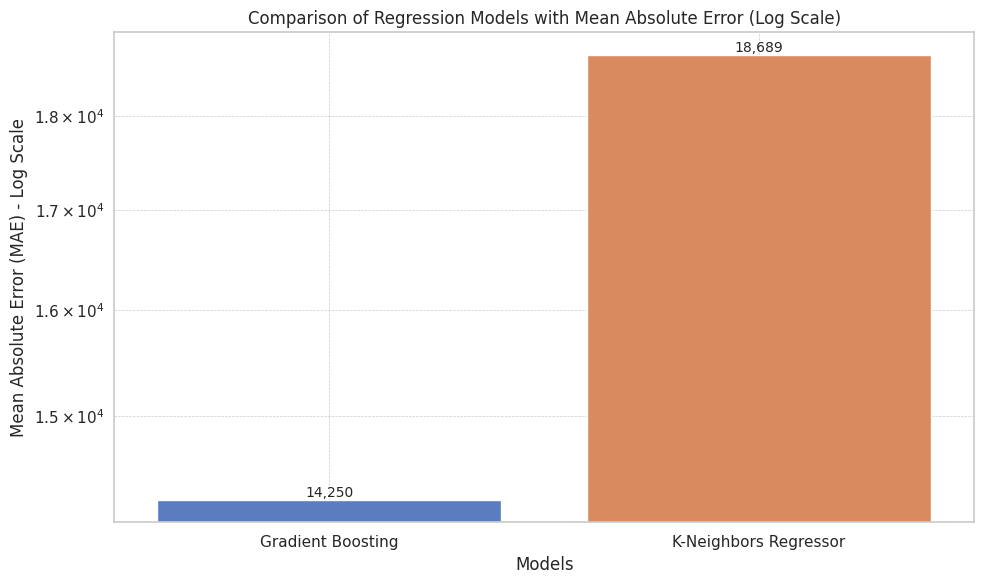

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un DataFrame avec les résultats des deux modèles
models_comparison = pd.DataFrame({
    "Model": ["Gradient Boosting", "K-Neighbors Regressor"],
    "Mean Absolute Error (MAE)": [14250.99, 18689.00],
    "Root Mean Squared Error (RMSE)": [21621.52, 31385.74],
    "R² Score": [0.7377, 0.6773],
    "Accuracy (%)": [74.91, 72.86]
})

# Afficher le tableau avec une mise en forme claire
print("### Comparaison des modèles de régression ###")
print(models_comparison.to_string(index=False))

# Appliquer un style seaborn pour améliorer l'affichage
sns.set(style="whitegrid", palette="muted")

# Afficher le barplot avec une échelle logarithmique pour le MAE
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Mean Absolute Error (MAE)", data=models_comparison, palette="muted")

# Appliquer une échelle logarithmique
plt.yscale("log")
plt.title("Comparison of Regression Models with Mean Absolute Error (Log Scale)")
plt.ylabel("Mean Absolute Error (MAE) - Log Scale")
plt.xlabel("Models")

# Annoter les barres avec les valeurs
for index, row in models_comparison.iterrows():
    plt.text(index, row["Mean Absolute Error (MAE)"], f"{int(row['Mean Absolute Error (MAE)']):,}",
             ha="center", va="bottom", fontsize=10)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# **Barplot of machine learning models with mean absolute error**